# Performing basic uni- and multivariate statistical analsysis of untargeted metabolomics data

**Updated on:** 2023-01-06 23:10:05 CEST

In this Jupyter Notebook we perform basic explorative uni- and multivariate statistical analyses of an untargeted metabolomics data set, including data cleaning steps, normalization and batch correction.

**Authors**: Abzer Kelminal (abzer.shah@uni-tuebingen.de), Francesco Russo (russof85@gmail.com), Filip Ottosson (faot@ssi.dk), Jan Stanstrup (jst@nexs.ku.dk), Madeleine Ernst (maet@ssi.dk) <br>
**Input file format**: .csv files or .txt files <br>
**Outputs**: .csv files, .pdf & .svg images  <br>
**Dependencies**: tidyverse, vegan, IRdisplay, svglite, factoextra, ggrepel, ggsci, matrixStats, ComplexHeatmap, dendextend, NbClust (add package versions?)

---
A guide on how to run R within a Jupyter Notebook can be found here: [Installing via Anaconda](https://github.com/Functional-Metabolomics-Lab/Jupyter-Notebook-Installation/blob/main/Anaconda%20with%20R%20kernel%20installation.pdf), [Installation of R Jupyter Notebook through command terminal](https://developers.refinitiv.com/en/article-catalog/article/setup-jupyter-notebook-r)

---
<b><font size=3> SPECIAL NOTE: Please read the comments before proceeding with the code and let us know if you run into any errors and if you think it could be commented better. We would highly appreciate your suggestions and comments!!</font> </b>

---

# About the Data
(*To be edited*) The files used in this tutorial are part of a study published by [Petras and coworkers (2021)](https://doi.org/10.1016/j.chemosphere.2020.129450). Here, authors investigated the coastal environments in northern San Diego, USA, after a major rainfall event in winter 2017/2018 to observe the seawater chemotype. The dataset contains surface seawater samples collected (−10 cm) at 30 sites spaced approximately 300 meters apart and 50–100 m offshore along the San Diego coastline from Torrey Pines State Beach to Mission Bay (Torrey Pines, La Jolla Shores, La Jolla Reefs, Pacific and Mission Beach) at 3 different time points:

- December 2017
- January 2018 – After a major rainfall -> resulting in decreased salinity of water
- October 2018 <br>

The resulting data consists of 4384 LC-MS/MS features. A huge shift in the seawater's organic matter chemotype after the rainfall was observed. Seawater samples collected during October 2018, were not published in the original article, but are added to this tutorial. <br>

Data files were preprocessed using [MZmine3](http://mzmine.github.io/) and the [feature-based molecular networking workflow in GNPS](https://gnps.ucsd.edu/ProteoSAFe/status.jsp?task=cf6e14abf5604f47b28b467a513d3532).

# About the different sections in the Notebook

## Data-cleaning

It involves cleaning the feature table, which contains all the features (metabolites, in our case) with their corresponding intensities. The data cleanup steps involved are: 1) Batch Correction 2) Blank removal 3) Imputation 4) Normalisation 5) Scaling. Each step would be discussed in detail later. Once the data is cleaned, we can then use it for further statistical analyses.

## Univariate statistical analysis

Here, we will use univariate statistical methods, such as ANOVA, to investigate whether there are differences in the levels of individual features between different time points in the dataset.

## Unsupervised multivariate analyses
### PCoA and PERMANOVA
Here, we will perform a Principal Coordinate Analysis (PCoA), also known as metric or classical Multidimensional Scaling (metric MDS) to explore and visualize patterns in an untargeted mass spectromtery-based metabolomics dataset. We will then assess statistical significance of the patterns and dispersion of different sample types using permutational multivariate analysis of variance (PERMANOVA).

### Cluster Analyses and Heatmaps
We will also perform different cluster analyses to explore patterns in the data. This will help us to discover subgroups of samples or features that share a certain level of similarity. Clustering is an example of unsupervised learning where no labels are given to the learning algorithm which will try to find patterns/structures in the input data on its own. The goal of clustering is to find these hidden patterns.<br>

Some types of cluster analyses (e.g. hierarchical clustering) are often associated with heatmaps. Heatmaps are a visual representation of the data where columns are usually samples and rows are features (in our case, different metabolic features). The color scale of heatmaps indicates higher or lower intensity (for instance, blue is lower and red is higher intensity).<br>

There are a lot of good videos and resources out there explaining very well the principle behind clustering. Some good ones are the following:<br>
- Hierarchical clustering and heatmaps: https://www.youtube.com/watch?v=7xHsRkOdVwo<br>
- K-means clustering: https://www.youtube.com/watch?v=4b5d3muPQmA
- ComplexHeatmap R package: https://jokergoo.github.io/ComplexHeatmap-reference/book/ 

## Supervised multivariate analyses
we will perform a supervised analysis using XGBoost ....

---

# Questions we investigate in the statistical analysis sections 

<font color = 'red'>(**To be edited according to this data**)</font>  
<br>
**Univariate Statistical analysis:**
*   Are metabolite levels dependent on the dilution?
*   How does the affected metabolite change throughout the dilution series?
*   How large are the differences?
---
**MULTIVARIATE ANALYSES:**
**Exploratory analyses: PCoA & PERMANOVA**
*   Can we monitor algal bloom by looking at metabolomic profiles of marine dissolved organic matter?
---
**Cluster analysis and Heatmaps**
- Can we monitor algal bloom by looking at metabolomic profiles of marine dissolved organic matter?
- Are we able to group/cluster together samples derived from different concentrations of algae extracts using metabolic profiles? <br>
- Which samples are the most similar? <br>
- Are there any patterns defining the groups/clusters? That is, which features cluster together?
---
**Supervised analysis: XGBoost**
- sfsdfsdf
---

# Package installation
Before we start, we need to install all packages, which we need for our analyses. You only need to install the packages once, thereafter you can directly proceed with loading the libraries. 

In [1]:
#install.packages(c("tidyverse","vegan","IRdisplay","svglite","factoextra","ggrepel","KODAMA")) #for data-cleanup and multivariate stats


The downloaded binary packages are in
	/var/folders/k7/zs6jm5h95875g74l66xfxq6m0000gn/T//Rtmp511THI/downloaded_packages


In [2]:
#install.packages(c("ggsci","matrixStats","cowplot")) #univariate stats


The downloaded binary packages are in
	/var/folders/k7/zs6jm5h95875g74l66xfxq6m0000gn/T//Rtmp511THI/downloaded_packages


In [1]:
#install.packages("BiocManager") # clustering & heatmaps
#BiocManager::install("ComplexHeatmap")
#install.packages(c("dendextend","NbClust"))

Load libraries

In [1]:
# Calling the local libraries:
suppressPackageStartupMessages({
  library(tidyverse) #used for data science. The eight core packages inside this library are: ggplot2 (data visualisation), dplyr (data manipulation), tidyr, readr, purrr, tibble, stringr, and forcats
  library(KODAMA) # to use the normalisation function
  library(ggrepel) #mainly used to repel overlapping text labels in ggplots
  library(vegan) #popular library for analysing ecological diversity and for multivariate analysis of community data. Here, we use it for PCoA
  library(IRdisplay) #better display of output cells in Jupyter Notebooks running iwth IRKernel. Library not needed when running the script in RStudio
  library(svglite) #to save the plots in support vector graphics (svg) format
  library(factoextra) #for extracting and visualizing outputs of multivariate analyses such as PCA, k-means
  library(ggsci) #provides color palettes for ggplot2 that can be used for scientific journals
  library(matrixStats) #contains highly optimized functions to perform statistics on matrix data
  library(cowplot) #efficient functions to arrange several plots
  library(ComplexHeatmap) #for visualising heatmaps
  library(dendextend) # for getting dendograms
  library(NbClust) # for finding the optimum no.of clusters to be used for a clustering method
})

Warning message:
“package ‘tidyverse’ was built under R version 4.1.2”
Warning message:
“package ‘ggplot2’ was built under R version 4.1.2”
Warning message:
“package ‘tibble’ was built under R version 4.1.2”
Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
Warning message:
“package ‘KODAMA’ was built under R version 4.1.2”
Warning message:
“package ‘Rtsne’ was built under R version 4.1.2”
Warning message:
“package ‘umap’ was built under R version 4.1.2”
Warning message:
“package ‘ggrepel’ was built under R version 4.1.2”
Warning message:
“package ‘vegan’ was built under R version 4.1.2”
Warning message:
“package ‘IRdisplay’ was built under R version 4.1.2”
Warning message:
“package ‘svglite’ was built under R version 4.1.2”
Warning message:
“package ‘matrixStats’ was built under R version 4.1.2”
Warning message:
“package ‘dendextend’ was built under R version 4.1.2”
Warning message:
“package ‘NbClust’ 

We also set some global options to adjust plot size throughout the notebook

In [2]:
#Global settings for plot size in the output cell:
options(repr.plot.width=8, repr.plot.height=8,res=600) # the parameters: width, height & resolution can be changed

# Input files 

1) <b>Feature table:</b> A typical output file of an LC-MS/MS metabolomics experiment, containing all mass spectral features (or peaks) with their corresponding relative intensities across samples. The feature table we use in this tutorial was obtained from MZmine3. (Filetype: .csv file) <br> 

2) <b>Metadata:</b> An Excel file saved in .txt format that is created by the user, providing additional information about the samples (e.g. sample type, tissue type, species, timepoint of collection etc.) In this tutorial we are using the [metadata format recognized by GNPS workflows](https://ccms-ucsd.github.io/GNPSDocumentation/metadata/). The first column should be named 'filename' and all remaining column headers should be prefixed with ATTRIBUTE_: e.g. ATTRIBUTE_SampleType, ATTRIBUTE_timepoint etc. (Filetype: .txt file) <br>

Feature table and metadata used in this tutorial can be accessed at:
https://github.com/Functional-Metabolomics-Lab/Statistical-analysis-of-non-targeted-LC-MSMS-data/tree/main/data

# Loading the data

We can directly pull the data files from our Functional Metabolomics GitHub page and load them into R

In [3]:
ft_url <- 'https://raw.githubusercontent.com/Functional-Metabolomics-Lab/Statistical-analysis-of-non-targeted-LC-MSMS-data/main/data/SD_BeachSurvey_GapFilled_quant.csv'
md_url <- 'https://raw.githubusercontent.com/Functional-Metabolomics-Lab/Statistical-analysis-of-non-targeted-LC-MSMS-data/main/data/20221125_Metadata_SD_Beaches_with_injection_order.txt'

In [4]:
ft <- read.csv(ft_url, header = T, check.names = F)
md <- read.csv(md_url, header = T, check.names = F, sep = ',')

Lets check how the data looks, the below lines of code show the first 6 rows of the feature and metadata tables as well as their dimensions (numbers of rows and columns)

In [5]:
head(ft) 
dim(ft) 

,row ID,row m/z,row retention time,row ion mobility,row ion mobility unit,row CCS,correlation group ID,annotation network number,best ion,auto MS2 verify,⋯,SD_12-2017_15_b.mzXML Peak area,SD_12-2017_15_a.mzXML Peak area,SD_12-2017_27_a.mzXML Peak area,SD_12-2017_29_b.mzXML Peak area,SD_12-2017_21_a.mzXML Peak area,SD_12-2017_30_a.mzXML Peak area,SD_12-2017_28_b.mzXML Peak area,SD_12-2017_29_a.mzXML Peak area,SD_12-2017_28_a.mzXML Peak area,
,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<int>,<int>,<chr>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,92572,151.0351,13.3636720,NA,NA,NA,NA,NA,,NA,⋯,0,0,21385.48,1138.271,1144.812,12139.16,5394.689,5270.766,1007.839,NA
2,2513,151.0351,1.1299012,NA,NA,NA,NA,NA,,NA,⋯,0,0,27123.89,0.000,0.000,0.00,0.000,0.000,0.000,NA
3,42,151.0351,0.5507245,NA,NA,NA,212,NA,,NA,⋯,1150350,1103478,2638109.20,1446266.600,595216.500,1225695.20,1424855.000,1557217.400,1797692.500,NA
4,1870,151.0352,0.8867797,NA,NA,NA,NA,NA,,NA,⋯,0,0,314371.84,0.000,0.000,0.00,0.000,0.000,0.000,NA
5,2127,151.0964,0.9860167,NA,NA,NA,NA,NA,,NA,⋯,0,0,0.00,0.000,0.000,0.00,0.000,0.000,0.000,NA
6,86368,151.0976,11.0962260,NA,NA,NA,NA,NA,,NA,⋯,0,0,0.00,0.000,0.000,0.00,0.000,0.000,0.000,NA


[1] 11217   200

In [6]:
head(md)
dim(md)

,filename,ATTRIBUTE_Sample.Type,ATTRIBUTE_Batch,ATTRIBUTE_Month,ATTRIBUTE_Year,ATTRIBUTE_Sample_Location,ATTRIBUTE_Replicate,ATTRIBUTE_Spot,ATTRIBUTE_Latitude,ATTRIBUTE_Longitude,ATTRIBUTE_Sample_Area,ATTRIBUTE_Spot_Name,time_run,Injection_order
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>
1,SD_10_2018_10_a.mzXML,Sample,3,Oct,2018,10,a,10,32.86261,-117.2604,SIO_La_Jolla_Shores,SIO_South_Pier,18/07/2020 18:19,145
2,SD_10_2018_10_b.mzXML,Sample,3,Oct,2018,10,b,10,32.86261,-117.2604,SIO_La_Jolla_Shores,SIO_South_Pier,18/07/2020 18:35,146
3,SD_10_2018_11_a.mzXML,Sample,3,Oct,2018,11,a,11,32.85601,-117.2625,SIO_La_Jolla_Shores,La_Jolla_Shores,18/07/2020 18:51,147
4,SD_10_2018_11_b.mzXML,Sample,3,Oct,2018,11,b,11,32.85601,-117.2625,SIO_La_Jolla_Shores,La_Jolla_Shores,18/07/2020 19:07,148
5,SD_10_2018_12_a.mzXML,Sample,3,Oct,2018,12,a,12,32.85161,-117.2696,La_Jolla_Cove,Cove,18/07/2020 19:23,149
6,SD_10_2018_12_b.mzXML,Sample,3,Oct,2018,12,b,12,32.85161,-117.2696,La_Jolla_Cove,Cove,18/07/2020 19:39,150


[1] 186  14

# Exploring our metadata

<p style='text-align: justify;'> Before starting with our analysis, we have a look at our metadata. For this purpose we define a function. A function is a collection of commands, which takes one or multiple input variables and creates a corresponding output. By creating functions, we avoid having to write big code chuncks multiple times. Instead, we can call a sequence of code lines by their function name. <font color="red"> The following lines will not produce any outputs. </font> The outputs will only be produced when we call the function further downstream and give it an input variable. </p>

<p style='text-align: justify;'> To explore our metadata we define a function called InsideLevels. This function creates a summary table of our metadata, including data types and levels contained in each column.  <font color ="blue"> The input is a metadata table and the output consists of a summary dataframe. </font></p>

In [7]:
 InsideLevels <- function(metatable){
    LEVELS <- c()
    typ<-c()
    COUNT <- c()
    for(i in 1:ncol(metatable)){
      temp <- as.data.frame(table(metatable[,i]))
      x <- temp$Var1 #getting the name of each level in every column
      if(is.double(metatable[,i])==T){x=round(as.double(x),2)}
      LEVELS <- rbind(LEVELS,toString(x))
      COUNT <- rbind(COUNT,toString(temp$Freq)) # getting the frequency of each level in every column
      typ <- rbind(typ,class(metatable[,i])) # getting the class of each column
    }
    out <- data.frame(INDEX=c(1:ncol(metatable)),ATTRIBUTES=colnames(metatable),LEVELS,COUNT,'ATTRIBUTE_CLASS'=typ,row.names=NULL)
    return(out)
  }

Let's have a look at our metadata, with the above defined function InsideLevels. 

In [8]:
InsideLevels(md[,2:12]) #excluding columns: filename, timerun, injection order

INDEX,ATTRIBUTES,LEVELS,COUNT,ATTRIBUTE_CLASS
<int>,<chr>,<chr>,<chr>,<chr>
1,ATTRIBUTE_Sample.Type,"Blank, Sample","6, 180",character
2,ATTRIBUTE_Batch,"1, 2, 3","62, 62, 62",integer
3,ATTRIBUTE_Month,"Dec, Jan, Oct","62, 62, 62",character
4,ATTRIBUTE_Year,"2017, 2018","62, 124",integer
5,ATTRIBUTE_Sample_Location,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30","6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6",integer
6,ATTRIBUTE_Replicate,"a, b","93, 93",character
7,ATTRIBUTE_Spot,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30","6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6",integer
8,ATTRIBUTE_Latitude,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31","6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6",numeric
9,ATTRIBUTE_Longitude,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31","6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6",numeric


The above table is a summary of our metadata tabel. For example, the 1st row says that there are 2 different types of samples under 'ATTRIBUTE_Sample-Type', namely "Blank" and "Sample". The number of files corresponding to each of these categories is given in the COUNT column. <br> For example, we have 6 files belonging to the "Blank" sample type and 180 files to the "Sample" sample type.

# Arranging metadata and feature table in the same order

<p style='text-align: justify;'> In the next cells, we bring feature table and metadata in the correct format such that <font color ="green"> the rownames of the metadata and column names of the feature table are the same. </font> Filenames and order need to correspond in both tables, as we will match metadata attributes to the feature table. In that way, both metadata and feature table, can easily be filtered. </p>

In [9]:
new_ft <- ft #storing the files under different names to preserve the original files
new_md <- md

In [10]:
colnames(new_ft) <- gsub(' Peak area','',colnames(new_ft)) #removing Peak area extensions from the column names of ft

new_ft <- new_ft[,colSums(is.na(new_ft))<nrow(new_ft)] #removing if any NA columns present in the ft file
new_md <- new_md[,colSums(is.na(new_md))<nrow(new_md)] #removing if any NA columns present in the md file

head(new_ft,2) #returns the first 2 rows of ft
head(new_md,2) #returns the first 2 rows of md

,row ID,row m/z,row retention time,correlation group ID,annotation network number,best ion,identified by n=,partners,neutral M mass,SD_01-2018_5_b.mzXML,⋯,SD_12-2017_23_b.mzXML,SD_12-2017_15_b.mzXML,SD_12-2017_15_a.mzXML,SD_12-2017_27_a.mzXML,SD_12-2017_29_b.mzXML,SD_12-2017_21_a.mzXML,SD_12-2017_30_a.mzXML,SD_12-2017_28_b.mzXML,SD_12-2017_29_a.mzXML,SD_12-2017_28_a.mzXML
,<int>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,92572,151.0351,13.363672,NA,NA,,NA,,NA,0.00,⋯,0,0,0,21385.48,1138.271,1144.812,12139.16,5394.689,5270.766,1007.839
2,2513,151.0351,1.129901,NA,NA,,NA,,NA,14900.48,⋯,0,0,0,27123.89,0.000,0.000,0.00,0.000,0.000,0.000


,filename,ATTRIBUTE_Sample.Type,ATTRIBUTE_Batch,ATTRIBUTE_Month,ATTRIBUTE_Year,ATTRIBUTE_Sample_Location,ATTRIBUTE_Replicate,ATTRIBUTE_Spot,ATTRIBUTE_Latitude,ATTRIBUTE_Longitude,ATTRIBUTE_Sample_Area,ATTRIBUTE_Spot_Name,time_run,Injection_order
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>
1,SD_10_2018_10_a.mzXML,Sample,3,Oct,2018,10,a,10,32.86261,-117.2604,SIO_La_Jolla_Shores,SIO_South_Pier,18/07/2020 18:19,145
2,SD_10_2018_10_b.mzXML,Sample,3,Oct,2018,10,b,10,32.86261,-117.2604,SIO_La_Jolla_Shores,SIO_South_Pier,18/07/2020 18:35,146


In [11]:
#remove the (front & tail) spaces, if any present, from the filenames of md:
new_md$filename <- trimws(new_md$filename, which = c("both")) 
#Changing the row names of the files into the combined name as "ID_mz_RT":
rownames(new_ft) <- paste(new_ft$'row ID',round(new_ft$'row m/z',digits = 3),round(new_ft$'row retention time',digits = 3), sep = '_') 

In [12]:
new_ft <- new_ft[,grep('.mzXML',colnames(new_ft))] #Picking only the files with column names containing 'mzXML'

In [13]:
head(new_ft,2)
head(new_md,2)

,SD_01-2018_5_b.mzXML,SD_01-2018_7_b.mzXML,SD_01-2018_7_a.mzXML,SD_01-2018_3_b.mzXML,SD_01-2018_6_a.mzXML,SD_01-2018_8_a.mzXML,SD_01-2018_1_a.mzXML,SD_01-2018_2_b.mzXML,SD_01-2018_4_b.mzXML,SD_01-2018_2_a.mzXML,⋯,SD_12-2017_23_b.mzXML,SD_12-2017_15_b.mzXML,SD_12-2017_15_a.mzXML,SD_12-2017_27_a.mzXML,SD_12-2017_29_b.mzXML,SD_12-2017_21_a.mzXML,SD_12-2017_30_a.mzXML,SD_12-2017_28_b.mzXML,SD_12-2017_29_a.mzXML,SD_12-2017_28_a.mzXML
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
92572_151.035_13.364,0.00,0.000,0,0,0,0,0,0,0,0,⋯,0,0,0,21385.48,1138.271,1144.812,12139.16,5394.689,5270.766,1007.839
2513_151.035_1.13,14900.48,4685.837,0,0,0,0,0,0,0,0,⋯,0,0,0,27123.89,0.000,0.000,0.00,0.000,0.000,0.000


,filename,ATTRIBUTE_Sample.Type,ATTRIBUTE_Batch,ATTRIBUTE_Month,ATTRIBUTE_Year,ATTRIBUTE_Sample_Location,ATTRIBUTE_Replicate,ATTRIBUTE_Spot,ATTRIBUTE_Latitude,ATTRIBUTE_Longitude,ATTRIBUTE_Sample_Area,ATTRIBUTE_Spot_Name,time_run,Injection_order
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>
1,SD_10_2018_10_a.mzXML,Sample,3,Oct,2018,10,a,10,32.86261,-117.2604,SIO_La_Jolla_Shores,SIO_South_Pier,18/07/2020 18:19,145
2,SD_10_2018_10_b.mzXML,Sample,3,Oct,2018,10,b,10,32.86261,-117.2604,SIO_La_Jolla_Shores,SIO_South_Pier,18/07/2020 18:35,146


In [14]:
new_ft <- new_ft[,order(colnames(new_ft)),drop=F] #ordering the ft by its column names
new_md <- new_md[order(new_md$filename),,drop=F] #ordering the md by the 1st column filename

In [15]:
# how many files in the metadata are also present in the feature table
table(new_md$filename %in% colnames(new_ft))


TRUE 
 186 

In [16]:
identical(new_md$filename, colnames(new_ft))

[1] TRUE

The output says that all 186 files are present in both new_md & new_ft. Furthermore metadata filenames and feature table column names are identical, indicating that they are in the same order. If the above line returns FALSE, it means some files are missing. To check names of the files that are missing we can run the next cell. If everything went well, the next cell should return no output. 

In [17]:
# which file names in the metadata are not in the feature table?
setdiff(new_md$filename,colnames(new_ft))

character(0)

In [18]:
#checking the dimensions of our new ft and md:
cat("The number of rows and columns in our original ft is:",dim(ft),"\n")
cat("The number of rows and columns in our new ft is:",dim(new_ft),"\n")
cat("The number of rows and columns in our new md is:",dim(new_md))

The number of rows and columns in our original ft is: 11217 200 
The number of rows and columns in our new ft is: 11217 186 
The number of rows and columns in our new md is: 186 14

Notice that the number of columns of the feature table is the same as the number of rows in our metadata. Now, we have both our feature table and metadata in the same order.

Lets check the files once again!!

# Batch Correction
To be edited:
Both the batch corrections is not valid for our provided dataset. 

With this dataset, Petras et al., assessed the chemical impacts of a major rain event in northern San Diego, California (USA) in Winter 2017/2018.

1. Inter-batch Correction
2. Intra-batch Correction

## Steps involved in inter-batch correction:
1. Calculate the <b>overall mean</b> of each feature 
2. Calculate the mean of each feature for each batch &rarr; <b>Batch Mean</b>
3. The feature intensities in each batch are then divided by the <b>batch mean</b> and multiplied by the <b>overall mean</b>.

## Steps involved in intra-batch correction:


Note that for our samples inter-batch correction is not necessary. 

In [19]:
ft_t <- as.data.frame(t(new_ft)) # transposing the new ft so that the rownames of ft_t and rownames of new_md will be the same
ft_t <- ft_t %>%
        mutate_all(as.numeric)  #converting all values to numeric
        #mutate(filename=rownames(ft_t)) %>% #adding a column filename with the rownames of ft_t
        #select(filename, everything()) #positioning filename as 1st column

In [20]:
head(ft_t, n=3)
identical(new_md$filename,rownames(ft_t)) #should return TRUE now

,92572_151.035_13.364,2513_151.035_1.13,42_151.035_0.551,1870_151.035_0.887,2127_151.096_0.986,86368_151.098_11.096,90458_151.098_12.344,88889_151.098_11.826,87841_151.098_11.55,1653_152.057_0.847,⋯,88116_1444.398_11.482,89487_1444.398_12.017,86967_1444.398_11.216,90591_1444.399_12.387,91218_1444.399_12.614,92162_1444.399_12.973,88518_1444.399_11.718,88057_1445.398_11.541,89348_1445.398_11.988,91876_1445.399_12.863
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SD_01-2018_1_a.mzXML,0,0,2827136,64247.68,0.000,0,0,0,0,0.000,⋯,22355.824,81129.42,9451.771,57114.74,33504.23,0.000,20393.60,12523.67,21131.930,4865.259
SD_01-2018_1_b.mzXML,0,0,3066569,67403.99,5057.914,0,0,0,0,0.000,⋯,5870.526,24207.17,0.000,29632.88,28452.48,5834.431,13967.27,11848.81,8412.412,3065.691
SD_01-2018_10_a.mzXML,0,0,2863941,201483.19,4317.684,0,0,0,0,5206.803,⋯,317439.000,1123902.40,74504.555,134384.03,762986.30,0.000,157763.02,130236.70,124595.060,138897.280


[1] TRUE

# Blank removal
<a id="data_split"></a>

[I think it might be good to be very clear about defintion of terms here, so it's not confusing, e.g. name features of interest = analyte features to distinguish them from blank features]

<p style='text-align: justify;'> Blank samples are samples, which contain no analytes of interest and consist for example of the solvent, matrix, tissue or growth media that was used to prepare or dissolve the samples and analytes of interest. Such as the analytes, the mass spectral features deriving from blank samples are also detected by the LC-MS/MS instrument. Our goal here is to remove these features from our samples and analytes of interest, which we will use for further downstream analysis. </p>

**How do we remove these blank features?** </br> 

<p style='text-align: justify;'> At first we split the feature table into blanks and samples, and then compare blanks to the samples to identify the background features coming from blanks. A common filtering method is to use a cutoff to remove features that are not present sufficient enough in our biological samples. </p>

The steps followed in the next few cells are:
1. <p style='text-align: justify;'> We find an average for all the feature intensities in your blank set and sample set. Therefore, we average each feature intensity across all samples and blanks. </p>
2. <p style='text-align: justify;'> Next, we get a ratio of this average_feature_blanks vs average_feature_sample. This ratio blank/sample tells us how much of that particular feature of a sample gets its contribution from blanks. If it is more than 30% (or cutoff as 0.3), we consider the feature as noise. </p>
3. <p style='text-align: justify;'> The resulting information (if ratio > cutoff) is stored in a bin such that 1 = noise or background signal and 0 = analyte signal</p>
4. <p style='text-align: justify;'> We count the number of features in the bin that satisfies the condition ratio > cutoff, and consider those features as 'noise or background features' and remove them. </p>

## Splitting data into blanks and samples using metadata

In order to remove blank features from our samples, we first split our feature table into blanks and samples using the metadata and our InsideLevels function created in Section 8.

In [21]:
InsideLevels(new_md[2:12])

INDEX,ATTRIBUTES,LEVELS,COUNT,ATTRIBUTE_CLASS
<int>,<chr>,<chr>,<chr>,<chr>
1,ATTRIBUTE_Sample.Type,"Blank, Sample","6, 180",character
2,ATTRIBUTE_Batch,"1, 2, 3","62, 62, 62",integer
3,ATTRIBUTE_Month,"Dec, Jan, Oct","62, 62, 62",character
4,ATTRIBUTE_Year,"2017, 2018","62, 124",integer
5,ATTRIBUTE_Sample_Location,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30","6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6",integer
6,ATTRIBUTE_Replicate,"a, b","93, 93",character
7,ATTRIBUTE_Spot,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30","6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6",integer
8,ATTRIBUTE_Latitude,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31","6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6",numeric
9,ATTRIBUTE_Longitude,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31","6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6",numeric


In [22]:
#Getting the blank based on the metadata
md_Blank <- new_md %>% filter(`ATTRIBUTE_Sample.Type` == "Blank") #filtering the rows from metadata with the condition = blank
Blank <- ft_t[which(rownames(ft_t) %in% (md_Blank$`filename`)),,drop=F] #getting the corresponding rows from ft

head(Blank)
dim(Blank)

,92572_151.035_13.364,2513_151.035_1.13,42_151.035_0.551,1870_151.035_0.887,2127_151.096_0.986,86368_151.098_11.096,90458_151.098_12.344,88889_151.098_11.826,87841_151.098_11.55,1653_152.057_0.847,⋯,88116_1444.398_11.482,89487_1444.398_12.017,86967_1444.398_11.216,90591_1444.399_12.387,91218_1444.399_12.614,92162_1444.399_12.973,88518_1444.399_11.718,88057_1445.398_11.541,89348_1445.398_11.988,91876_1445.399_12.863
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SD_01-2018_PPL_Bl_1.mzXML,0,0,80114.620,0,23387.72,0.00,0.00,0.0,0.00,0,⋯,97086.41,150529.2,105396.63,64037.152,112919.62,26315.72,52188.0,39243.56,61705.28,28096.68
SD_01-2018_PPL_Bl_2.mzXML,0,0,21310.246,0,21032.02,0.00,0.00,0.0,0.00,0,⋯,39701.70,107531.1,82760.02,78997.610,97719.95,24918.46,208566.6,0.00,0.00,20651.02
SD_10_2018_PPL_Blank_1.mzXML,0,0,74143.170,0,0.00,229800.60,107550.44,165857.5,67758.91,0,⋯,0.00,0.0,0.00,7669.985,0.00,0.00,0.0,0.00,0.00,0.00
SD_10_2018_PPL_Blank_2.mzXML,0,0,105766.586,0,115959.33,18853.69,49843.91,101073.4,172785.38,0,⋯,0.00,0.0,0.00,4412.909,0.00,0.00,0.0,0.00,0.00,0.00
SD_12-2017_PPL_Bl_1.mzXML,0,0,4432.968,0,0.00,0.00,0.00,0.0,0.00,0,⋯,0.00,0.0,0.00,0.000,0.00,0.00,0.0,0.00,0.00,0.00
SD_12-2017_PPL_Bl_2.mzXML,0,0,6813.541,0,0.00,0.00,0.00,0.0,0.00,0,⋯,0.00,0.0,0.00,0.000,0.00,0.00,0.0,0.00,0.00,0.00


[1]     6 11217

In [23]:
#Getting the samples based on the metadata 
md_Samples <- new_md %>% filter(`ATTRIBUTE_Sample.Type` == "Sample")
Samples <- ft_t[which(rownames(ft_t) %in% (md_Samples$`filename`)),,drop=F]

head(Samples, n=3)
dim(Samples)

,92572_151.035_13.364,2513_151.035_1.13,42_151.035_0.551,1870_151.035_0.887,2127_151.096_0.986,86368_151.098_11.096,90458_151.098_12.344,88889_151.098_11.826,87841_151.098_11.55,1653_152.057_0.847,⋯,88116_1444.398_11.482,89487_1444.398_12.017,86967_1444.398_11.216,90591_1444.399_12.387,91218_1444.399_12.614,92162_1444.399_12.973,88518_1444.399_11.718,88057_1445.398_11.541,89348_1445.398_11.988,91876_1445.399_12.863
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SD_01-2018_1_a.mzXML,0,0,2827136,64247.68,0.000,0,0,0,0,0.000,⋯,22355.824,81129.42,9451.771,57114.74,33504.23,0.000,20393.60,12523.67,21131.930,4865.259
SD_01-2018_1_b.mzXML,0,0,3066569,67403.99,5057.914,0,0,0,0,0.000,⋯,5870.526,24207.17,0.000,29632.88,28452.48,5834.431,13967.27,11848.81,8412.412,3065.691
SD_01-2018_10_a.mzXML,0,0,2863941,201483.19,4317.684,0,0,0,0,5206.803,⋯,317439.000,1123902.40,74504.555,134384.03,762986.30,0.000,157763.02,130236.70,124595.060,138897.280


[1]   180 11217

## Removing blanks

Now that we have our feature table split into blanks and samples, we can start removing blank features.

**<font color='red'> We use a cutoff of 0.3 </font>**, meaning that in order for a feature to be considered of interest it needs to have a ratio of average_feature_blanks vs average_feature_sample <30%. In the below cell you can interactively change the threshold to any value between 0.1 and 1. </p>

In [24]:
#When cutoff is low, more noise (or background) detected; With higher cutoff, less background detected, thus more features observed
Cutoff <- as.numeric(readline('Enter Cutoff value between 0.1 & 1:')) # (i.e. 10% - 100%). Ideal cutoff range: 0.1-0.3
    
#Getting mean for every feature in blank and Samples
Avg_ft <- data.frame(Avg_blank=colMeans(Blank, na.rm= F)) # set na.rm = F to check if there are NA values. When set as T, NA values are changed to 0
Avg_ft$Avg_samples <- colMeans(Samples, na.rm= F)
    
#Getting the ratio of blank vs Sample
Avg_ft$Ratio_blank_Sample <- (Avg_ft$Avg_blank+1)/(Avg_ft$Avg_samples+1)
    
# Creating a bin with 1s when the ratio>Cutoff, else put 0s
Avg_ft$Bg_bin <- ifelse(Avg_ft$Ratio_blank_Sample > Cutoff, 1, 0 )

# Checking if there are any NA values present. Having NA values in the 4 variables will affect the final dataset to be created
IRdisplay::display(data.frame(NA_count=sapply(Avg_ft, function(x) sum(is.na(x)))))

#Calculating the number of background features and features present
print(paste("Total no.of features:",nrow(Avg_ft)))
print(paste("No.of Background or noise features:",sum(Avg_ft$Bg_bin ==1,na.rm = T)))
print(paste("No.of features after excluding noise:",(ncol(Samples) - sum(Avg_ft$Bg_bin ==1,na.rm = T))))
                                
Blank_removal <- merge(as.data.frame(t(Samples)), Avg_ft, by=0) %>%
                    filter(Bg_bin == 0) %>% #picking only the features
                    select(-c(Avg_blank,Avg_samples,Ratio_blank_Sample,Bg_bin)) %>% #removing the last 4 columns
                    column_to_rownames(var="Row.names")

Enter Cutoff value between 0.1 & 1:0.3


,NA_count
,<int>
Avg_blank,0
Avg_samples,0
Ratio_blank_Sample,0
Bg_bin,0


[1] "Total no.of features: 11217"
[1] "No.of Background or noise features: 2125"
[1] "No.of features after excluding noise: 9092"


In [26]:
head(Blank_removal, 3)
dim(Blank_removal)

,SD_01-2018_1_a.mzXML,SD_01-2018_1_b.mzXML,SD_01-2018_10_a.mzXML,SD_01-2018_10_b.mzXML,SD_01-2018_11_a.mzXML,SD_01-2018_11_b.mzXML,SD_01-2018_12_a.mzXML,SD_01-2018_12_b.mzXML,SD_01-2018_13_a.mzXML,SD_01-2018_13_b.mzXML,⋯,SD_12-2017_5_a.mzXML,SD_12-2017_5_b.mzXML,SD_12-2017_6_a.mzXML,SD_12-2017_6_b.mzXML,SD_12-2017_7_a.mzXML,SD_12-2017_7_b.mzXML,SD_12-2017_8_a.mzXML,SD_12-2017_8_b.mzXML,SD_12-2017_9_a.mzXML,SD_12-2017_9_b.mzXML
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10015_282.169_2.763,50907.97,51443.73,109227.84,176375.7,104468.73,107860.7,416643.34,100000.83,113347.2,229451.5,⋯,81368.72,110551.6,86917.61,73583.30,135812.39,142495.92,172251.69,259688.52,205187.22,139750.70
10035_325.139_2.817,196008.38,99569.05,144769.50,133548.6,508455.56,99449.2,450726.62,161512.50,151758.7,146276.4,⋯,106263.34,308457.9,207960.67,227622.08,115274.43,534276.94,113054.56,114660.29,729054.10,80493.73
10037_216.123_2.847,90480.91,411595.38,52234.81,65790.7,86723.45,151315.9,43235.33,74290.67,150423.6,153153.6,⋯,22688.39,0.0,22162.11,85534.48,41371.13,64968.08,82838.27,47383.38,82120.17,57830.04


[1] 9092  180

In [27]:
head(md_Samples, 3)
dim(md_Samples)

,filename,ATTRIBUTE_Sample.Type,ATTRIBUTE_Batch,ATTRIBUTE_Month,ATTRIBUTE_Year,ATTRIBUTE_Sample_Location,ATTRIBUTE_Replicate,ATTRIBUTE_Spot,ATTRIBUTE_Latitude,ATTRIBUTE_Longitude,ATTRIBUTE_Sample_Area,ATTRIBUTE_Spot_Name,time_run,Injection_order
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>
1,SD_01-2018_1_a.mzXML,Sample,2,Jan,2018,1,a,1,32.93365,-117.2648,Torrey_Pines,Lagoon_Outlet,16/01/2018 11:36,65
2,SD_01-2018_1_b.mzXML,Sample,2,Jan,2018,1,b,1,32.93365,-117.2648,Torrey_Pines,Lagoon_Outlet,16/01/2018 11:52,66
3,SD_01-2018_10_a.mzXML,Sample,2,Jan,2018,10,a,10,32.86261,-117.2604,SIO_La_Jolla_Shores,SIO_South_Pier,16/01/2018 16:23,83


[1] 180  14

In [28]:
write.csv(Blank_removal,paste0('141222_Blanks_Removed_CutOff_Used_',Cutoff,'.csv'),row.names =TRUE)

# Imputation

<p style='text-align: justify;'> For several reasons, real world datasets might have some missing values in it, in the form of NA, NANs or 0s. Eventhough the gapfilling step of MZmine fills the missing values, we still end up with some missing values or 0s in our feature table. This could be problematic for statistical analysis. </p> 
<p style='text-align: justify;'> We cannot simply discard those rows or columns with missing values as we will lose valuable data. Instead we can try imputing the missing values. Imputation involves replacing the missing values in the data with a meaningful, reasonable guess. There are several methods, such as: </p> 
  
1) Mean imputation (replacing the missing values in a column with the mean or average of the column)  
2) Replacing it with the most frequent value  
3) Several other machine learning imputation methods such as k-nearest neighbors algorithm(k-NN), Hidden Markov Model(HMM)

[need to add some references here to the methods you are referring to]

Here, we use the blank-removed feature table to assess frequencies across relative intensities. This plot shows us how many features have which relative intensities. We then create random values between 0 and the minimum value in our blank-removed table and randomly replace all 0s with these random values. 

[1] "The minimum value greater than 0 in gap-filled table: 892"


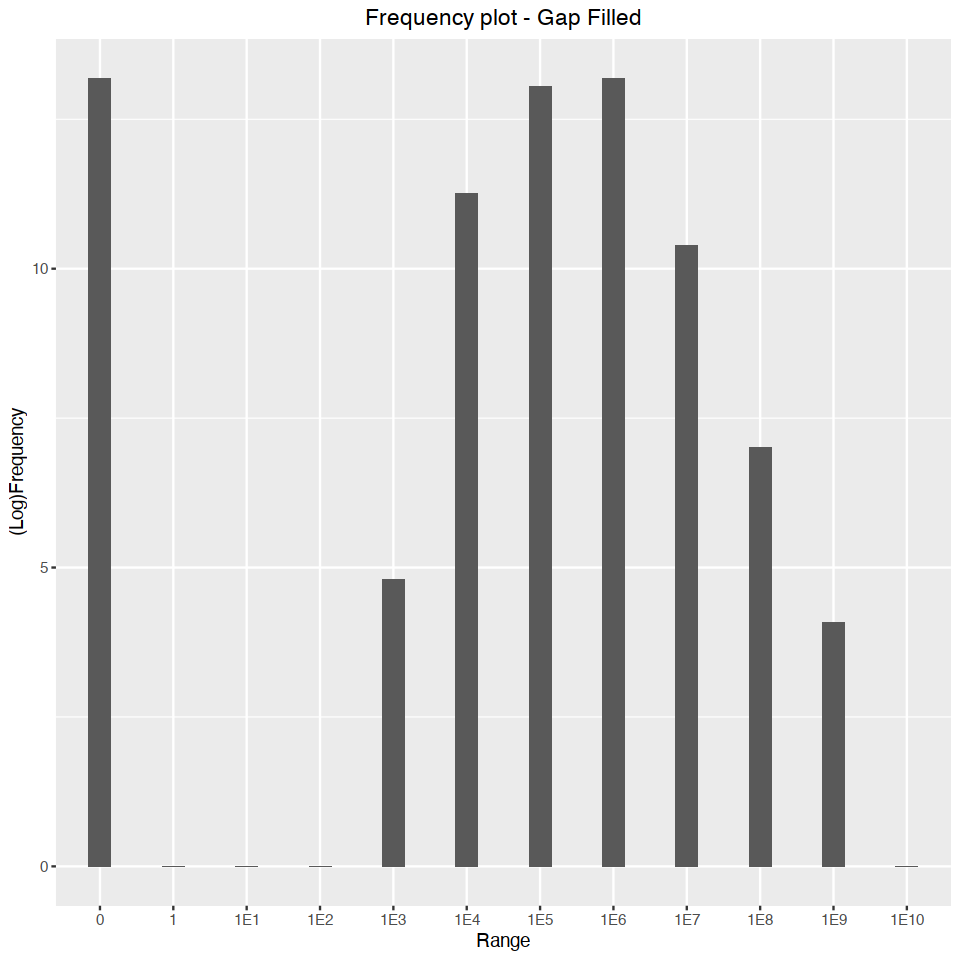

In [29]:
#creating bins from -1 to 10^10 using sequence function seq()
bins <- c(-1,0,(1 * 10^(seq(0,10,1)))) 

#cut function cuts the give table into its appropriate bins
scores_gapfilled <- cut(as.matrix(Blank_removal),bins, labels = c('0','1',paste("1E",1:10,sep="")))

#transform function convert the tables into a column format: easy for visualization
FreqTable <- transform(table(scores_gapfilled)) #contains 2 columns: "scores_x1", "Freq"
FreqTable$Log_Freq <- log(FreqTable$Freq+1) #Log scaling the frequency values
colnames(FreqTable)[1] <- 'Range_Bins' #changing the 1st colname to 'Range Bins'

## GGPLOT2
ggplot(FreqTable, aes(x=Range_Bins, y=Log_Freq))+ 
    geom_bar(stat="identity",position = "dodge", width=0.3) + 
    ggtitle(label="Frequency plot - Gap Filled") +
    xlab("Range") + ylab("(Log)Frequency") + 
    theme(plot.title = element_text(hjust = 0.5))

Cutoff_LOD <- round(min(Blank_removal[Blank_removal!=min(Blank_removal)]))
print(paste0("The minimum value greater than 0 in gap-filled table: ",Cutoff_LOD)) 

The above histogram shows that, in our, blank-removed feature table, there are many zeros present. And no values in the range between 0 to 1E2. The minimum value greater than 0 in our dataframe is in between 1E2 & 1E3 (and that value is 892).

In [30]:
# Creating random variables (between 0 and Cutoff_LOD) to replace all zeros
set.seed(141222)
ran_values <-round(runif(length(Blank_removal),0,Cutoff_LOD),digits=1)
ran_values

[1] 772.3 183.1 252.2 202.9 131.9 113.8 521.3 813.3 800.5 208.5 173.7 283.4
 [13] 722.4 610.1 666.7  51.6 580.2 397.2 760.0 669.9 595.1 235.3 491.9 159.7
 [25] 402.8  72.9 452.5 778.8 682.3 271.0 475.6 218.7 702.6 367.5 778.3  93.4
 [37] 499.9 722.0 149.8 889.5  87.2 884.6 509.1 142.3 437.5 809.2  50.1 858.1
 [49] 405.1 813.4  54.1 570.9 567.4 313.3 289.2 345.2 454.2 118.5 213.3 371.0
 [61] 370.0  88.6  96.8 575.8 109.5 599.6  76.5 552.7  23.4 453.9  24.3 481.0
 [73] 140.1 443.4 327.8 761.3 296.4 152.5 135.4 515.0 638.4 603.3 547.6 876.5
 [85] 470.7 220.4 120.5 261.7 568.2 805.8 622.9 694.7 354.8 596.9 884.6  39.6
 [97]  35.2 651.4 527.1 821.0 714.8 320.9 405.8  72.6 579.3 254.2 123.3  23.7
[109] 169.8 470.1 588.2  12.6 579.7  74.4 233.2 430.7 699.1 846.3 138.2 391.1
[121]   3.3 621.8 262.9 237.3 438.3 878.5 410.4 253.3 736.5 189.5 814.3 206.5
[133] 466.1  87.8 814.4 333.3 224.3 470.3 122.8 532.4 159.7 192.2 698.6 884.7
[145] 320.8 167.6 640.9 344.0  58.6 350.8 606.8 520.9 720.5 426.5 243.4 216.7
[157] 868.6 821.9 382.6  89.3  88.7 389.2  48.6 146.1 287.5 630.8 300.7 633.8
[169] 316.7 320.5 713.2 548.1 524.6 365.8  90.4 449.1 401.0 375.9 613.4 290.4

In [31]:
Imputed <- Blank_removal  %>%
            mutate(across(everything(), ~replace(., . == 0 , sample(ran_values, size=1))))

In [32]:
head(Imputed)

,SD_01-2018_1_a.mzXML,SD_01-2018_1_b.mzXML,SD_01-2018_10_a.mzXML,SD_01-2018_10_b.mzXML,SD_01-2018_11_a.mzXML,SD_01-2018_11_b.mzXML,SD_01-2018_12_a.mzXML,SD_01-2018_12_b.mzXML,SD_01-2018_13_a.mzXML,SD_01-2018_13_b.mzXML,⋯,SD_12-2017_5_a.mzXML,SD_12-2017_5_b.mzXML,SD_12-2017_6_a.mzXML,SD_12-2017_6_b.mzXML,SD_12-2017_7_a.mzXML,SD_12-2017_7_b.mzXML,SD_12-2017_8_a.mzXML,SD_12-2017_8_b.mzXML,SD_12-2017_9_a.mzXML,SD_12-2017_9_b.mzXML
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10015_282.169_2.763,50907.97,51443.73,109227.84,176375.7,104468.73,107860.7,416643.34,100000.83,113347.2,229451.5,⋯,81368.72,110551.56,86917.61,73583.30,135812.39,142495.92,172251.69,259688.52,205187.22,139750.70
10035_325.139_2.817,196008.38,99569.05,144769.50,133548.6,508455.56,99449.2,450726.62,161512.50,151758.7,146276.4,⋯,106263.34,308457.94,207960.67,227622.08,115274.43,534276.94,113054.56,114660.29,729054.10,80493.73
10037_216.123_2.847,90480.91,411595.38,52234.81,65790.7,86723.45,151315.9,43235.33,74290.67,150423.6,153153.6,⋯,22688.39,778.30,22162.11,85534.48,41371.13,64968.08,82838.27,47383.38,82120.17,57830.04
10047_338.159_2.845,446560.70,239021.97,342724.84,353313.2,521227.88,332560.0,346388.06,273638.16,305627.2,389490.4,⋯,208418.17,125679.05,308052.75,111927.20,286369.12,197076.14,92500.69,188610.12,118005.11,65923.90
10058_280.117_2.961,182757.80,274146.03,657006.10,195791.4,510705.34,635679.6,673892.60,380135.94,600647.0,195535.0,⋯,233442.28,279472.40,379879.38,329682.70,397069.06,260427.12,350335.88,415309.03,498892.88,312734.10
10059_414.175_2.851,121197.44,201966.10,138082.42,105518.8,622.90,120000.0,475107.25,336686.12,99081.2,760.0,⋯,215587.89,58109.17,805.80,206988.38,156651.17,59568.41,59445.21,202858.06,224752.27,150956.19


In [33]:
sum(Imputed==0) # checking if there are any zeros in our imputed table 

[1] 0

In [34]:
write.csv(Imputed,'141222_Imputed_QuantTable.csv',row.names =T)

# Normalization

[add some description of what normalization is]

To be edited... Here, we present 2 types of normalization. TIC or PQN. Choose according to your data.

## Total Ion Current (TIC) or sample-centric normalization

The following code performs sample-centric (column-wise) normalisation. Here, we divide each element (mass spectral feature) of a particular column (sample) with its column sum.

In [35]:
Normalized_data_TIC <- t(normalization(t(Imputed), method = "sum")$newXtrain) 
head(Normalized_data_TIC,n=3)
dim(Normalized_data_TIC)
print(paste('No.of NA values in Normalized data:',sum(is.na(Normalized_data_TIC)== T)))

,SD_01-2018_1_a.mzXML,SD_01-2018_1_b.mzXML,SD_01-2018_10_a.mzXML,SD_01-2018_10_b.mzXML,SD_01-2018_11_a.mzXML,SD_01-2018_11_b.mzXML,SD_01-2018_12_a.mzXML,SD_01-2018_12_b.mzXML,SD_01-2018_13_a.mzXML,SD_01-2018_13_b.mzXML,⋯,SD_12-2017_5_a.mzXML,SD_12-2017_5_b.mzXML,SD_12-2017_6_a.mzXML,SD_12-2017_6_b.mzXML,SD_12-2017_7_a.mzXML,SD_12-2017_7_b.mzXML,SD_12-2017_8_a.mzXML,SD_12-2017_8_b.mzXML,SD_12-2017_9_a.mzXML,SD_12-2017_9_b.mzXML
10015_282.169_2.763,2.977175e-05,2.999528e-05,7.230727e-05,1.328148e-04,7.489287e-05,7.469619e-05,2.662925e-04,6.390917e-05,7.486779e-05,1.481398e-04,⋯,1.172983e-04,1.586839e-04,1.134921e-04,0.0000957115,1.578179e-04,1.528850e-04,1.724326e-04,2.600404e-04,2.198192e-04,1.511484e-04
10035_325.139_2.817,1.146287e-04,5.805570e-05,9.583535e-05,1.005651e-04,3.645081e-04,6.887101e-05,2.880764e-04,1.032204e-04,1.002393e-04,9.443975e-05,⋯,1.531855e-04,4.427554e-04,2.715433e-04,0.0002960733,1.339522e-04,5.732299e-04,1.131733e-04,1.148156e-04,7.810432e-04,8.705858e-05
10037_216.123_2.847,5.291461e-05,2.399888e-04,3.457870e-05,4.954185e-05,6.217140e-05,1.047900e-04,2.763333e-05,4.747816e-05,9.935738e-05,9.887989e-05,⋯,3.270679e-05,1.117159e-06,2.893803e-05,0.0001112567,4.807443e-05,6.970476e-05,8.292529e-05,4.744758e-05,8.797619e-05,6.254650e-05


[1] 9092  180

[1] "No.of NA values in Normalized data: 0"


In [36]:
write.csv(Normalized_data_TIC,'141222_TIC_Normalised_Quant_table.csv',row.names =T)

## PQN (Probabilistic Quotient Normalization)

In [37]:
Normalized_data_pqn <- t(normalization(t(Imputed), method = "pqn")$newXtrain)
head(Normalized_data_pqn,n=3)
dim(Normalized_data_pqn)
print(paste('No.of NA values in Normalized data:',sum(is.na(Normalized_data_pqn)== T)))

,SD_01-2018_1_a.mzXML,SD_01-2018_1_b.mzXML,SD_01-2018_10_a.mzXML,SD_01-2018_10_b.mzXML,SD_01-2018_11_a.mzXML,SD_01-2018_11_b.mzXML,SD_01-2018_12_a.mzXML,SD_01-2018_12_b.mzXML,SD_01-2018_13_a.mzXML,SD_01-2018_13_b.mzXML,⋯,SD_12-2017_5_a.mzXML,SD_12-2017_5_b.mzXML,SD_12-2017_6_a.mzXML,SD_12-2017_6_b.mzXML,SD_12-2017_7_a.mzXML,SD_12-2017_7_b.mzXML,SD_12-2017_8_a.mzXML,SD_12-2017_8_b.mzXML,SD_12-2017_9_a.mzXML,SD_12-2017_9_b.mzXML
10015_282.169_2.763,3.540018e-05,3.017861e-05,5.255678e-05,1.068633e-04,6.356057e-05,9.757233e-05,0.0002231066,7.298662e-05,5.541492e-05,1.189655e-04,⋯,0.0001028529,9.632791e-05,6.755138e-05,0.0001836754,1.122295e-04,1.400207e-04,1.449955e-04,2.741661e-04,1.882258e-04,1.713079e-04
10035_325.139_2.817,1.362995e-04,5.841053e-05,6.965824e-05,8.091504e-05,3.093531e-04,8.996315e-05,0.0002413577,1.178815e-04,7.419413e-05,7.584102e-05,⋯,0.0001343205,2.687715e-04,1.616247e-04,0.0005681803,9.525785e-05,5.249965e-04,9.516542e-05,1.210526e-04,6.687881e-04,9.867006e-05
10037_216.123_2.847,6.291825e-05,2.414556e-04,2.513364e-05,3.986156e-05,5.276403e-05,1.368825e-04,0.0000231519,5.422180e-05,7.354139e-05,7.940673e-05,⋯,0.0000286789,6.781633e-07,1.722414e-05,0.0002135074,3.418733e-05,6.383958e-05,6.973039e-05,5.002499e-05,7.533185e-05,7.088867e-05


[1] 9092  180

[1] "No.of NA values in Normalized data: 0"


In [38]:
write.csv(Normalized_data_pqn,'141222_PQN_Normalised_Quant_table.csv',row.names =T)

# Scaling

[add some description here on why we scale data and what it is]

In [39]:
head(Imputed, 3)

,SD_01-2018_1_a.mzXML,SD_01-2018_1_b.mzXML,SD_01-2018_10_a.mzXML,SD_01-2018_10_b.mzXML,SD_01-2018_11_a.mzXML,SD_01-2018_11_b.mzXML,SD_01-2018_12_a.mzXML,SD_01-2018_12_b.mzXML,SD_01-2018_13_a.mzXML,SD_01-2018_13_b.mzXML,⋯,SD_12-2017_5_a.mzXML,SD_12-2017_5_b.mzXML,SD_12-2017_6_a.mzXML,SD_12-2017_6_b.mzXML,SD_12-2017_7_a.mzXML,SD_12-2017_7_b.mzXML,SD_12-2017_8_a.mzXML,SD_12-2017_8_b.mzXML,SD_12-2017_9_a.mzXML,SD_12-2017_9_b.mzXML
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10015_282.169_2.763,50907.97,51443.73,109227.84,176375.7,104468.73,107860.7,416643.34,100000.83,113347.2,229451.5,⋯,81368.72,110551.6,86917.61,73583.30,135812.39,142495.92,172251.69,259688.52,205187.22,139750.70
10035_325.139_2.817,196008.38,99569.05,144769.50,133548.6,508455.56,99449.2,450726.62,161512.50,151758.7,146276.4,⋯,106263.34,308457.9,207960.67,227622.08,115274.43,534276.94,113054.56,114660.29,729054.10,80493.73
10037_216.123_2.847,90480.91,411595.38,52234.81,65790.7,86723.45,151315.9,43235.33,74290.67,150423.6,153153.6,⋯,22688.39,778.3,22162.11,85534.48,41371.13,64968.08,82838.27,47383.38,82120.17,57830.04


In [40]:
Imp_t <- as.data.frame(t(Imputed)) #transposing the imputed table
head(Imp_t, n=3)

,10015_282.169_2.763,10035_325.139_2.817,10037_216.123_2.847,10047_338.159_2.845,10058_280.117_2.961,10059_414.175_2.851,10072_305.157_2.851,10074_283.175_2.851,10078_300.201_2.851,10082_309.144_2.886,⋯,9833_268.175_2.821,9860_240.144_2.824,9876_414.139_2.761,9884_190.05_2.832,9897_333.144_2.881,9909_400.16_2.813,9918_252.123_2.833,9957_402.139_3.01,9972_323.123_2.716,9995_276.159_2.805
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SD_01-2018_1_a.mzXML,50907.97,196008.38,90480.91,446560.7,182757.8,121197.4,615145.0,2004980,2698188,206.5,⋯,108854.26,437011.9,90982.97,114156.20,73891.54,245935.5,447505.8,862014.4,199116.2,127721.8
SD_01-2018_1_b.mzXML,51443.73,99569.05,411595.38,239022.0,274146.0,201966.1,527106.5,1937671,2750866,455468.0,⋯,52075.82,570035.0,519301.53,99533.95,139784.78,144992.2,807991.6,777378.6,203698.4,279187.2
SD_01-2018_10_a.mzXML,109227.84,144769.50,52234.81,342724.8,657006.1,138082.4,375967.5,1521026,2176299,192929.8,⋯,5963.50,884.7,1225606.10,40589.14,118557.62,1358931.0,1107002.5,103690.9,955499.7,384465.1


In [41]:
# put the rows in the feature table and metadata in the same order
#Imp_t <- Imp_t[match(md_Samples$filename,rownames(Imp_t)),]
identical(rownames(Imp_t),md_Samples$filename) #should return TRUE

[1] TRUE

In [42]:
# center and scale data
Imp_s <- scale(Imp_t, center = T, scale = T)
head(Imp_s, n=3)

,10015_282.169_2.763,10035_325.139_2.817,10037_216.123_2.847,10047_338.159_2.845,10058_280.117_2.961,10059_414.175_2.851,10072_305.157_2.851,10074_283.175_2.851,10078_300.201_2.851,10082_309.144_2.886,⋯,9833_268.175_2.821,9860_240.144_2.824,9876_414.139_2.761,9884_190.05_2.832,9897_333.144_2.881,9909_400.16_2.813,9918_252.123_2.833,9957_402.139_3.01,9972_323.123_2.716,9995_276.159_2.805
SD_01-2018_1_a.mzXML,-1.1304738,-0.2996871,-0.1117275,2.2186171,-1.452146,-0.17593037,-0.3434611,-0.1778404,-0.1933466,-0.98676658,⋯,0.50953425,0.3411530,-0.9690079,-0.2136334,-1.0317304,-0.3097998,-0.177995,1.1679223,-0.9536029,-0.720846274
SD_01-2018_1_b.mzXML,-1.1265155,-0.6037355,1.9885898,0.2986375,-1.028317,0.38485813,-0.3749450,-0.1894778,-0.1876122,0.01064504,⋯,0.09238905,0.5326194,1.0516269,-0.3038794,-0.1930184,-0.7478181,1.252001,0.9551530,-0.9361819,-0.008639177
SD_01-2018_10_a.mzXML,-0.6995949,-0.4612301,-0.3618842,1.2580121,0.747262,-0.05869551,-0.4289946,-0.2615139,-0.2501572,-0.56453788,⋯,-0.24639335,-0.2865859,4.3836879,-0.6676765,-0.4632050,4.5197644,2.438135,-0.7384554,1.9221174,0.486389335


In [43]:
write.csv(Imp_s,'141222_scaled_table.csv',row.names =T)

# Univariate Analysis

In the following section we will use univariate statistical analyses to investigate how the metabolome is influenced by:


*   Sampling site: We will compare seven different sampling areas and investigate if there is a gradual shift in metabolite levels from along the coast. 
*   Heavy rainfall: By comparing metabolite levels before and and after a heavy rainfall in January 2018.

In [44]:
colnames(Imp_s) <- paste0('X',colnames(Imp_s))

In [45]:
head(Imp_s)
head(md)

,X10015_282.169_2.763,X10035_325.139_2.817,X10037_216.123_2.847,X10047_338.159_2.845,X10058_280.117_2.961,X10059_414.175_2.851,X10072_305.157_2.851,X10074_283.175_2.851,X10078_300.201_2.851,X10082_309.144_2.886,⋯,X9833_268.175_2.821,X9860_240.144_2.824,X9876_414.139_2.761,X9884_190.05_2.832,X9897_333.144_2.881,X9909_400.16_2.813,X9918_252.123_2.833,X9957_402.139_3.01,X9972_323.123_2.716,X9995_276.159_2.805
SD_01-2018_1_a.mzXML,-1.1304738,-0.2996871,-0.1117275,2.2186171,-1.45214596,-0.17593037,-0.3434611,-0.1778404,-0.1933466,-0.98676658,⋯,0.50953425,0.3411530,-0.9690079,-0.2136334,-1.0317304,-0.3097998,-0.177995,1.1679223,-0.9536029,-0.720846274
SD_01-2018_1_b.mzXML,-1.1265155,-0.6037355,1.9885898,0.2986375,-1.02831734,0.38485813,-0.3749450,-0.1894778,-0.1876122,0.01064504,⋯,0.09238905,0.5326194,1.0516269,-0.3038794,-0.1930184,-0.7478181,1.252001,0.9551530,-0.9361819,-0.008639177
SD_01-2018_10_a.mzXML,-0.6995949,-0.4612301,-0.3618842,1.2580121,0.74726202,-0.05869551,-0.4289946,-0.2615139,-0.2501572,-0.56453788,⋯,-0.24639335,-0.2865859,4.3836879,-0.6676765,-0.4632050,4.5197644,2.438135,-0.7384554,1.9221174,0.486389335
SD_01-2018_10_b.mzXML,-0.2034930,-0.4966067,-0.2732191,1.3559666,-1.39170040,-0.28478919,-0.3536444,-0.2742151,-0.2619255,-0.55716658,⋯,-0.25192058,-0.2285435,0.4843269,-0.5684610,1.5535042,-0.8303057,1.434401,4.0595393,0.6681850,0.985037345
SD_01-2018_11_a.mzXML,-0.7347561,0.6853785,-0.1363040,2.9093771,0.06876711,-1.01309686,-0.3657459,-0.2944197,-0.3309941,-0.53668380,⋯,-0.28563018,-0.2476378,1.5809568,-0.6620708,0.3906509,-0.6962297,2.185162,-0.5521619,0.4461508,1.021271440
SD_01-2018_11_b.mzXML,-0.7096955,-0.6041134,0.2861766,1.1639750,0.64835653,-0.18424409,-0.4531317,-0.3184602,-0.2880191,-0.56447259,⋯,-0.24677023,-0.2403817,0.3811471,-0.6653472,-1.1098859,3.4050080,1.824056,-0.6258216,-0.7639999,-0.815254939


,filename,ATTRIBUTE_Sample.Type,ATTRIBUTE_Batch,ATTRIBUTE_Month,ATTRIBUTE_Year,ATTRIBUTE_Sample_Location,ATTRIBUTE_Replicate,ATTRIBUTE_Spot,ATTRIBUTE_Latitude,ATTRIBUTE_Longitude,ATTRIBUTE_Sample_Area,ATTRIBUTE_Spot_Name,time_run,Injection_order
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>
1,SD_10_2018_10_a.mzXML,Sample,3,Oct,2018,10,a,10,32.86261,-117.2604,SIO_La_Jolla_Shores,SIO_South_Pier,18/07/2020 18:19,145
2,SD_10_2018_10_b.mzXML,Sample,3,Oct,2018,10,b,10,32.86261,-117.2604,SIO_La_Jolla_Shores,SIO_South_Pier,18/07/2020 18:35,146
3,SD_10_2018_11_a.mzXML,Sample,3,Oct,2018,11,a,11,32.85601,-117.2625,SIO_La_Jolla_Shores,La_Jolla_Shores,18/07/2020 18:51,147
4,SD_10_2018_11_b.mzXML,Sample,3,Oct,2018,11,b,11,32.85601,-117.2625,SIO_La_Jolla_Shores,La_Jolla_Shores,18/07/2020 19:07,148
5,SD_10_2018_12_a.mzXML,Sample,3,Oct,2018,12,a,12,32.85161,-117.2696,La_Jolla_Cove,Cove,18/07/2020 19:23,149
6,SD_10_2018_12_b.mzXML,Sample,3,Oct,2018,12,b,12,32.85161,-117.2696,La_Jolla_Cove,Cove,18/07/2020 19:39,150


Merge metadata and feature table to one data frame. As seen above, the columns "filename" and "X" identify the samples in the metadata and features table respectively. 

In [46]:
Data <- merge(md,Imp_s,by.x="filename",by.y="row.names")

We make sure that the merging of the two data frames was successful. 

In [47]:
dim(Imp_s)
dim(md)
dim(Data)

[1]  180 9092

[1] 186  14

[1]  180 9106

In [48]:
head(Data)

,filename,ATTRIBUTE_Sample.Type,ATTRIBUTE_Batch,ATTRIBUTE_Month,ATTRIBUTE_Year,ATTRIBUTE_Sample_Location,ATTRIBUTE_Replicate,ATTRIBUTE_Spot,ATTRIBUTE_Latitude,ATTRIBUTE_Longitude,⋯,X9833_268.175_2.821,X9860_240.144_2.824,X9876_414.139_2.761,X9884_190.05_2.832,X9897_333.144_2.881,X9909_400.16_2.813,X9918_252.123_2.833,X9957_402.139_3.01,X9972_323.123_2.716,X9995_276.159_2.805
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,SD_01-2018_1_a.mzXML,Sample,2,Jan,2018,1,a,1,32.93365,-117.2648,⋯,0.50953425,0.3411530,-0.9690079,-0.2136334,-1.0317304,-0.3097998,-0.177995,1.1679223,-0.9536029,-0.720846274
2,SD_01-2018_1_b.mzXML,Sample,2,Jan,2018,1,b,1,32.93365,-117.2648,⋯,0.09238905,0.5326194,1.0516269,-0.3038794,-0.1930184,-0.7478181,1.252001,0.9551530,-0.9361819,-0.008639177
3,SD_01-2018_10_a.mzXML,Sample,2,Jan,2018,10,a,10,32.86261,-117.2604,⋯,-0.24639335,-0.2865859,4.3836879,-0.6676765,-0.4632050,4.5197644,2.438135,-0.7384554,1.9221174,0.486389335
4,SD_01-2018_10_b.mzXML,Sample,2,Jan,2018,10,b,10,32.86261,-117.2604,⋯,-0.25192058,-0.2285435,0.4843269,-0.5684610,1.5535042,-0.8303057,1.434401,4.0595393,0.6681850,0.985037345
5,SD_01-2018_11_a.mzXML,Sample,2,Jan,2018,11,a,11,32.85601,-117.2625,⋯,-0.28563018,-0.2476378,1.5809568,-0.6620708,0.3906509,-0.6962297,2.185162,-0.5521619,0.4461508,1.021271440
6,SD_01-2018_11_b.mzXML,Sample,2,Jan,2018,11,b,11,32.85601,-117.2625,⋯,-0.24677023,-0.2403817,0.3811471,-0.6653472,-1.1098859,3.4050080,1.824056,-0.6258216,-0.7639999,-0.815254939


## ANOVA

We will test whether metabolite levels were different between different sampling sites, where seven different sampling areas will be compared. We  use the function aov to run statistical analyses using ANOVA. Since one ANOVA is being run for each metabolite feature, we run the analyses in a loop and save the output for each feature in a list called anova_out.<br>

The vector a indicates which columns in the dataset are features (i.e. from "start" to the last column of the data frame). <br>

We can run a for loop to pass each feature column into the first argument of the aov function, while the second argument, time point, is constant.

In [49]:
names(Data)[1:20]

[1] "filename"                  "ATTRIBUTE_Sample.Type"    
 [3] "ATTRIBUTE_Batch"           "ATTRIBUTE_Month"          
 [5] "ATTRIBUTE_Year"            "ATTRIBUTE_Sample_Location"
 [7] "ATTRIBUTE_Replicate"       "ATTRIBUTE_Spot"           
 [9] "ATTRIBUTE_Latitude"        "ATTRIBUTE_Longitude"      
[11] "ATTRIBUTE_Sample_Area"     "ATTRIBUTE_Spot_Name"      
[13] "time_run"                  "Injection_order"          
[15] "X10015_282.169_2.763"      "X10035_325.139_2.817"     
[17] "X10037_216.123_2.847"      "X10047_338.159_2.845"     
[19] "X10058_280.117_2.961"      "X10059_414.175_2.851"

In [50]:
start <- which(names(Data)=="Injection_order")+1 # This defines the column after injection order to be the first in the metabolite part of the dataset

In [51]:
anova_out=NULL
a <- start:ncol(Data) #We use the start variable to indicate where metabolite data starts in the data frame
for (i in 1:length(a)){
  anova_out[[i]] <- aov(scale(Data[,a[i]])~as.factor(Data$'ATTRIBUTE_Sample_Area'))
}

summary(anova_out[[1]]) #show the first entry in the list

                                       Df Sum Sq Mean Sq F value Pr(>F)
as.factor(Data$ATTRIBUTE_Sample_Area)   6   7.56   1.260   1.272  0.273
Residuals                             173 171.44   0.991               

Extract p- and F-values from anova output list: <br>
Lists of ANOVA results are not convenient when summarizing our findings. We extract the desired data from the list and summarize this in a dataframe called output_anova. <br>

The following is of interest:
*   Feature ID
*   p-value for ANOVA
*   p-value after taking multiple tests into consideration
*   F-value

In [52]:
#extract p- and F-values from ANOVA output list
output_anova <- data.frame(colnames(Data[start:ncol(Data)]))
colnames(output_anova)[1] <- "Metabolites"
output_anova["p"] <- sapply(1:length(a),function(n){summary(anova_out[[n]])[[1]][1,5]})
output_anova["p_bonferroni"] <- p.adjust(output_anova$p,method="bonferroni")
output_anova["significant"] <- ifelse(output_anova$p_bonferroni<0.05,"Significant","Nonsignificant")
output_anova["F"] <- sapply(1:length(a),function(n){summary(anova_out[[n]])[[1]][1,4]})

Now we have created a dataframe with desired results from the ANOVA. We can sort the results after the p value, using arrange, and select the top N rows using slice_head. These can be run as a sequence of operations using pipes (%>%). Are there any significant findings?

In [53]:
#Arrange the output anova list by top 20 p-values
output_anova %>% arrange (p) %>% slice_head(n=20)

Metabolites,p,p_bonferroni,significant,F
<chr>,<dbl>,<dbl>,<chr>,<dbl>
X59188_312.231_7.625,9.413695e-30,8.558932e-26,Significant,39.00333
X33200_260.196_4.886,1.649322e-28,1.499563e-24,Significant,36.75640
X57080_314.247_7.36,3.033785e-24,2.758317e-20,Significant,29.58350
X21870_246.18_3.969,7.261726e-23,6.602361e-19,Significant,27.42957
X80910_243.174_10.41,1.655165e-21,1.504876e-17,Significant,25.38274
X55328_312.232_7.138,3.090564e-21,2.809941e-17,Significant,24.98246
X76223_982.448_9.906,3.513942e-21,3.194876e-17,Significant,24.90051
X55979_529.37_7.232,4.365882e-21,3.969460e-17,Significant,24.76221
X47253_300.195_6.208,6.840211e-21,6.219120e-17,Significant,24.47723


**Plot ANOVA results**

We will use ggplot to visualize results from the ANOVA, with log(F-values) on the x-axis and -log(p) on the y-axis. Features are colored after statistical significance after multiple test correction. Since there are large differences in the F- and P-values, it is easier to plot their log.

We can also display the names of some of the top features in the plot. This easily gets very cluttered if we decide to display too many names, so starting at the top 5 could be a good idea. We can select these similarly to the cell above (pipes with arrange and slice_head). Using geom_text_repel, you can make sure the labels are not overlapping)

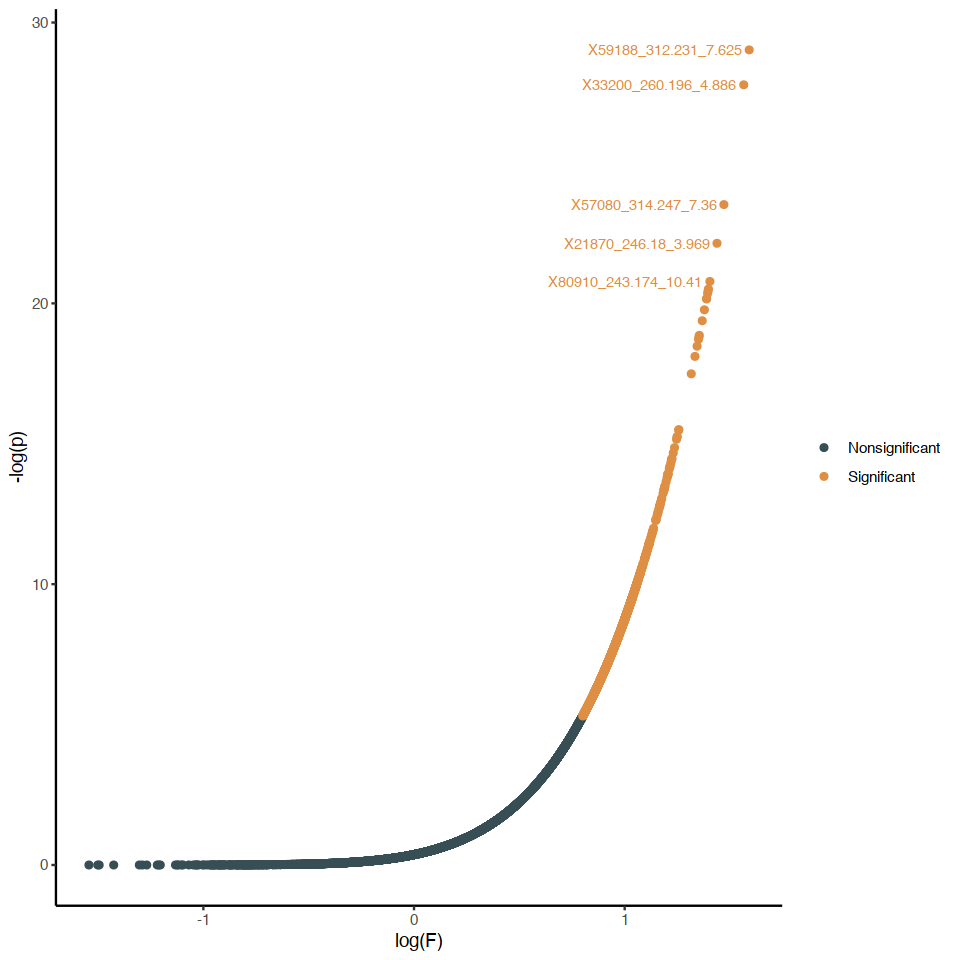

In [54]:
#plot ANOVA results
plot_anova <- ggplot(output_anova,aes(x=log(F,base=10),y=-log(p,base=10),color=significant))+ 
geom_point()+ theme_classic()+ scale_color_jama()+ ylab("-log(p)")+ xlab("log(F)")+
geom_text_repel(data=output_anova %>% arrange(p) %>% slice_head(n=5),
                  aes(label=Metabolites),size=3,show.legend = FALSE,max.overlaps = 100)+
theme(legend.title = element_blank())

plot_anova

The ANOVA only tests if the between group variance is larger than the within group variance. This means that the results only show you whether there are groupwise differences in metabolite levels, but do not show you which pair-wise group comparison are driving this difference. This can be furhter explored using Tukey's Honestly Significant Difference, which is explored further down.

If you want, you can also export the plots to a pdf

In [55]:
pdf("plot_ANOVA.pdf")
plot_anova
dev.off()

pdf 
  2

Or as a csv-file

In [56]:
write.csv(output_anova,"ANOVA_results.csv")

Show boxplot of the four metabolites with lowest p-value, in order to visualize how these particular metabolites differ between sampling sites

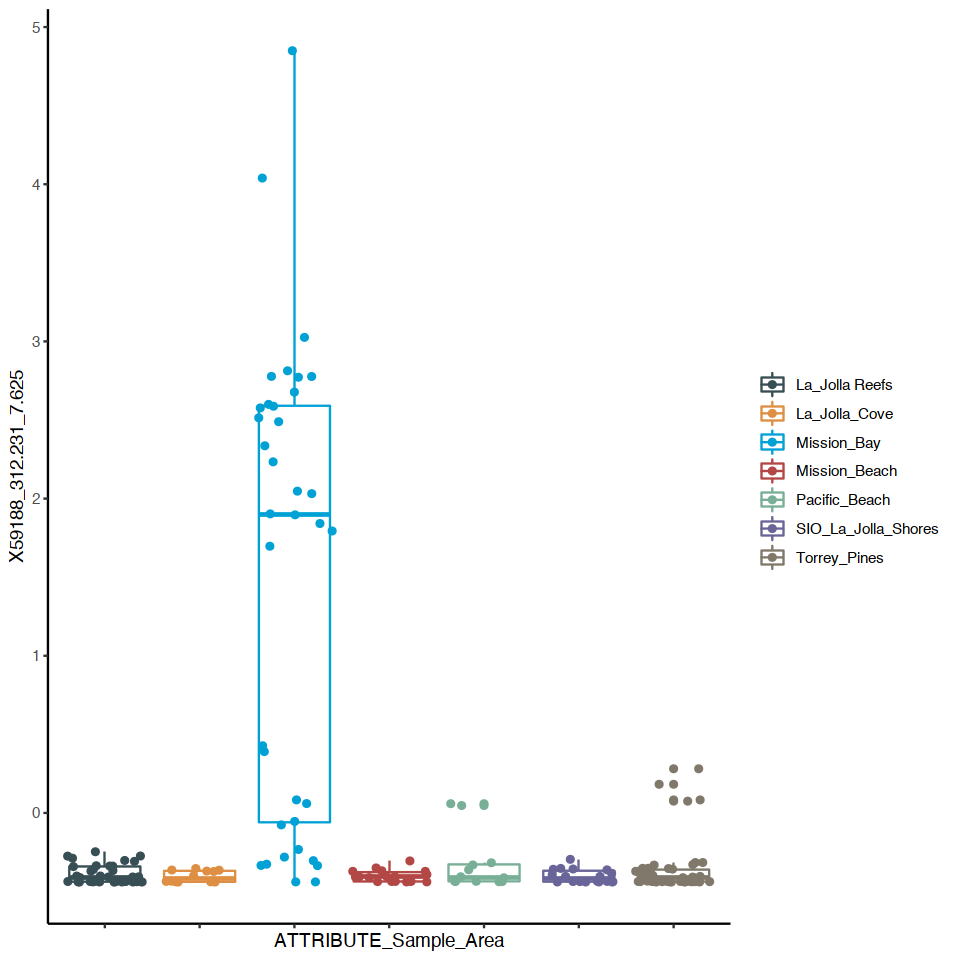

In [57]:
box1 <- ggplot(Data,aes(x=ATTRIBUTE_Sample_Area,y=X59188_312.231_7.625,color=ATTRIBUTE_Sample_Area))+
  geom_boxplot()+
  scale_color_jama()+
  theme_classic()+
  geom_jitter()+
  theme(legend.title = element_blank(),
axis.text.x= element_blank())
  

box2<- ggplot(Data,aes(x=ATTRIBUTE_Sample_Area,y=X33200_260.196_4.886,color=ATTRIBUTE_Sample_Area))+
  geom_boxplot()+
  scale_color_jama()+
  theme_classic()+
  geom_jitter()+
  theme(legend.title = element_blank(),
axis.text.x= element_blank())

box3 <- ggplot(Data,aes(x=ATTRIBUTE_Sample_Area,y=X57080_314.247_7.36,color=ATTRIBUTE_Sample_Area))+
  geom_boxplot()+
  scale_color_jama()+
  theme_classic()+
  geom_jitter()+
  theme(legend.title = element_blank(),
axis.text.x= element_blank())
box4 <- ggplot(Data,aes(x=ATTRIBUTE_Sample_Area,y=X21870_246.18_3.969,color=ATTRIBUTE_Sample_Area))+
  geom_boxplot()+
  scale_color_jama()+
  theme_classic()+
  geom_jitter()+
  theme(legend.title = element_blank(),
axis.text.x= element_blank())

combined_boxplots <- plot_grid(box1,box2,box3,box4)
box1


Write boxplot of top 4 metabolites to pdf

In [58]:
ggsave("combined_boxplots.pdf",combined_boxplots,height = 9,width = 16)

For the top four metabolites, Mission bay is the area that drives the difference between sampling sites, with much higher levels. 

## Tukey's post hoc test

As mentioned above, Tukey's post hoc test can be used to calculate, which features show statistically significant differences between individual sampling sites. 

The function TukeyHSD is used, which calculates these differences from the ANOVA output list previously generated. Results are stored in a new list called tukey_out.

In [59]:
#Tukey_output:
tukey_out=NULL
for (i in 1:length(a)){
tukey_out[[i]] <- TukeyHSD(anova_out[[i]])
}

tukey_out[[1]]$`as.factor(Data$'ATTRIBUTE_Sample_Area')` #shows the first entry of the list to show that all group wise differences are calculated.

NULL

We can show the results from a single entry in the list

In [60]:
tukey_out[[8]]$`as.factor(Data$ATTRIBUTE_Sample_Area)`

,diff,lwr,upr,p adj
La_Jolla_Cove-La_Jolla Reefs,0.064097151,-0.8296322,0.9578265,9.999918e-01
Mission_Bay-La_Jolla Reefs,1.210051203,0.5780891,1.8420133,9.911987e-07
Mission_Beach-La_Jolla Reefs,-0.008723713,-0.7827160,0.7652686,1.000000e+00
Pacific_Beach-La_Jolla Reefs,-0.063585458,-0.9573148,0.8301439,9.999922e-01
SIO_La_Jolla_Shores-La_Jolla Reefs,0.005684983,-0.7683073,0.7796773,1.000000e+00
Torrey_Pines-La_Jolla Reefs,0.178740818,-0.4124056,0.7698872,9.718359e-01
Mission_Bay-La_Jolla_Cove,1.145954053,0.2522247,2.0396834,3.392065e-03
Mission_Beach-La_Jolla_Cove,-0.072820863,-1.0720406,0.9263989,9.999910e-01
Pacific_Beach-La_Jolla_Cove,-0.127682609,-1.2222730,0.9669078,9.998552e-01
SIO_La_Jolla_Shores-La_Jolla_Cove,-0.058412168,-1.0576320,0.9408076,9.999976e-01


Every possible pair-wise group difference is explored. Since Mission Bay seemed to differ from other sampling sites for the four most significant metabolites, we could specifically look at the results from comparison between Mission Bay and another sampling site. In the example below we look at the differences between Mission Bay and La Jolla Reefs.

We extract the information we are interested in from tukey_out. For instance, the differences Mission bay and La Jolla Reefs:

- diff - Difference in average levels between Mission Bay and La Jolla Reefs
- p - p-value for group-wise difference after taking multiple group-wise comparisons into account.
- p_bonferroni - adjusted p-value after taking multiple tests (N number of features) into account
- significant - Whether the corrected p-value is below 0.05

In [61]:
#Extracting info for the tukey plot:
output_tukey <- data.frame(colnames(Data[start:ncol(Data)]))
colnames(output_tukey)[1] <- "Metabolites"
output_tukey$ID <- colnames(Data)[start:ncol(Data)]
output_tukey["diff"] <- sapply(1:length(a),function(n){tukey_out[[n]]$`as.factor(Data$ATTRIBUTE_Sample_Area)`[2,1]})
output_tukey["p"] <- sapply(1:length(a),function(n){tukey_out[[n]]$`as.factor(Data$ATTRIBUTE_Sample_Area)`[2,4]})
output_tukey["p_bonferroni"] <- p.adjust(output_tukey$p,method="bonferroni")
output_tukey["significant"] <- ifelse(output_tukey$p_bonferroni<0.05,"Significant","Nonsignificant")

Display the top results. Any significant findings? Other impressions?

In [62]:
output_tukey %>% arrange(p) %>% slice_head(n=20)

Metabolites,ID,diff,p,p_bonferroni,significant
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
X33200_260.196_4.886,X33200_260.196_4.886,1.829682,0.000000e+00,0.000000e+00,Significant
X59188_312.231_7.625,X59188_312.231_7.625,1.900977,0.000000e+00,0.000000e+00,Significant
X57080_314.247_7.36,X57080_314.247_7.36,1.777045,3.275158e-14,2.977774e-10,Significant
X55328_312.232_7.138,X55328_312.232_7.138,1.703309,4.274359e-14,3.886247e-10,Significant
X21870_246.18_3.969,X21870_246.18_3.969,1.719871,4.496403e-14,4.088130e-10,Significant
X13982_232.202_3.272,X13982_232.202_3.272,1.671664,4.529710e-14,4.118412e-10,Significant
X37281_272.164_5.298,X37281_272.164_5.298,1.676595,4.540812e-14,4.128506e-10,Significant
X47253_300.195_6.208,X47253_300.195_6.208,1.680497,4.785061e-14,4.350578e-10,Significant
X36504_214.191_5.227,X36504_214.191_5.227,1.717931,4.873879e-14,4.431331e-10,Significant


Create a volcano plot that displays -log(p) on the y-axis and group-difference on the x-axis. Again, display names of top findings in the plot

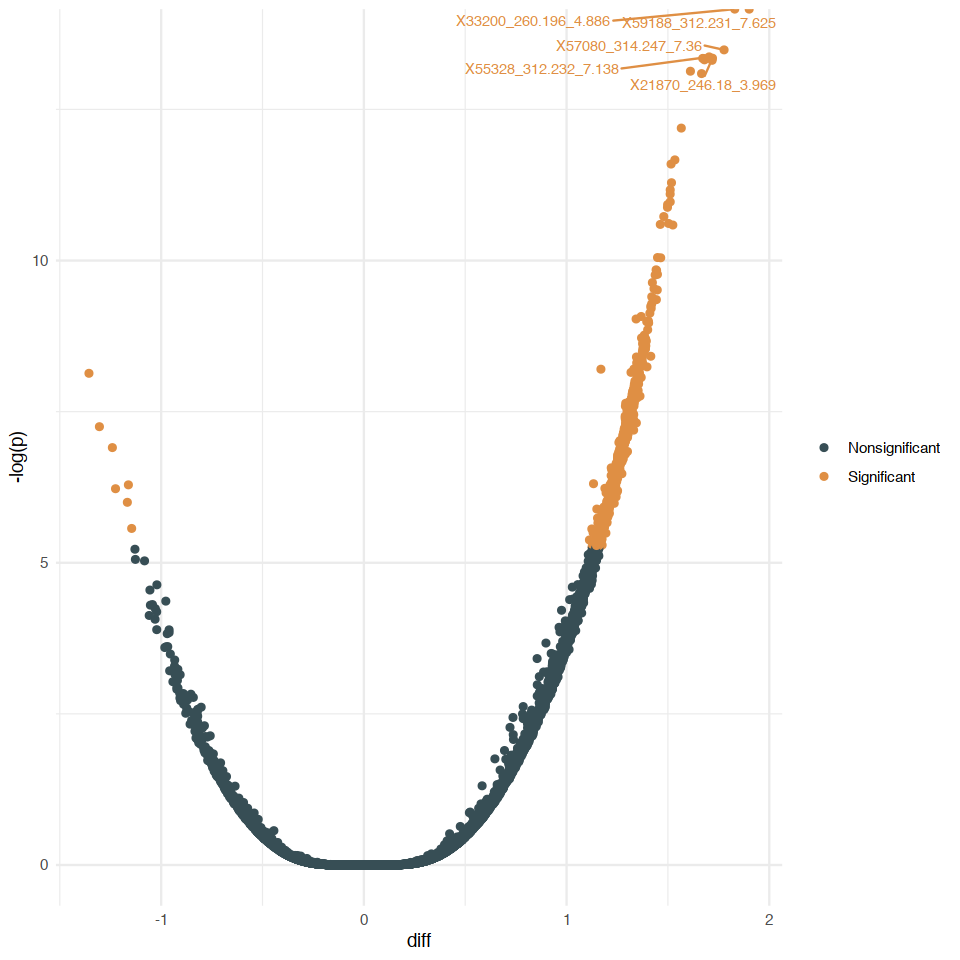

In [63]:
plot_tukey <- ggplot(output_tukey,aes(x=diff,y=-log(p,base=10),color=significant))+ 
              geom_point()+ theme_minimal()+ scale_color_jama()+ ylab("-log(p)") +
              geom_text_repel(data=output_tukey %>% arrange(p) %>% slice_head(n=5),
                aes(label=Metabolites),size=3,show.legend = FALSE,max.overlaps = 100) +
              theme(legend.title = element_blank())

plot_tukey

Export the plot as a pdf-file and the output as a csv.

In [64]:
pdf("TukeyHSD_MissionBayLaJollaReefs.pdf")
plot_tukey
dev.off()

write.csv(output_tukey,"TukeyHSD_output.csv")

pdf 
  2

## Linear regression analyses

We will now explore whether there is a gradual shift in the metabolome along the coast (south to north). Linear regression models can be used to see if there is an association between metabolites and the lattitude. Month of sampling will also be used as a covariate in order to adjust for potential temporal differences in sampling along the coast. 

In [65]:
lm_lat = NULL
for (i in 1:length(a)){
  lm_lat[[i]] <- lm(Data$ATTRIBUTE_Latitude~Data[,a[i]]+Data$ATTRIBUTE_Month)
}

In [66]:
output_lm <- data.frame(colnames(Data[start:ncol(Data)]))
colnames(output_lm)[1] <- "Metabolites"
output_lm$beta <- sapply(1:length(a),function(n){coef(lm_lat[[n]])[2]})
output_lm$lowint <- sapply(1:length(a),function(n){confint.default(lm_lat[[n]])[2,1]})
output_lm$highint <- sapply(1:length(a),function(n){confint.default(lm_lat[[n]])[2,2]})
output_lm$p <- sapply(1:length(a),function(n){summary(lm_lat[[n]])$coefficients[2,4]})
output_lm["p_bonferroni"] <- p.adjust(output_lm$p,method="bonferroni")
output_lm["significant"] <- ifelse(output_lm$p_bonferroni<0.05,"Significant","Nonsignificant")

In [67]:
output_lm %>% arrange(p) %>% head(n=20)

,Metabolites,beta,lowint,highint,p,p_bonferroni,significant
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,X60937_412.165_7.857,0.07027068,0.05826083,0.08228053,4.294457e-23,3.904521e-19,Significant
2,X80910_243.174_10.41,-0.03383680,-0.04044781,-0.02722580,5.147106e-19,4.679749e-15,Significant
3,X84748_363.31_10.856,-0.03961609,-0.04778406,-0.03144812,1.484116e-17,1.349359e-13,Significant
4,X26884_218.959_4.421,0.07415510,0.05845655,0.08985365,7.115561e-17,6.469468e-13,Significant
5,X51236_576.389_6.653,0.03943761,0.03106524,0.04780997,8.377970e-17,7.617250e-13,Significant
6,X4064_282.133_1.938,0.06311193,0.04946754,0.07675633,2.380842e-16,2.164661e-12,Significant
7,X90351_579.296_12.317,-0.03595599,-0.04386883,-0.02804315,6.442501e-16,5.857522e-12,Significant
8,X89184_547.269_11.938,-0.04227588,-0.05161440,-0.03293737,7.919489e-16,7.200399e-12,Significant
9,X26867_216.961_4.42,0.06736173,0.05224586,0.08247760,1.866532e-15,1.697051e-11,Significant


In [68]:
volcano_lat <- ggplot(output_lm,aes(x=beta,y=-log(p,base=10),color=significant))+
  geom_point()+
  theme_classic()+
  scale_color_jama()+
  geom_vline(xintercept = 0, linetype="dashed")+
  xlab("Beta")+
  ylab("-log(p")+
  theme(legend.title = element_blank())+
  geom_text_repel(data=output_lm %>% arrange(p) %>% slice_head(n=5),
                aes(label=Metabolites),size=3,show.legend = FALSE,max.overlaps = 100)

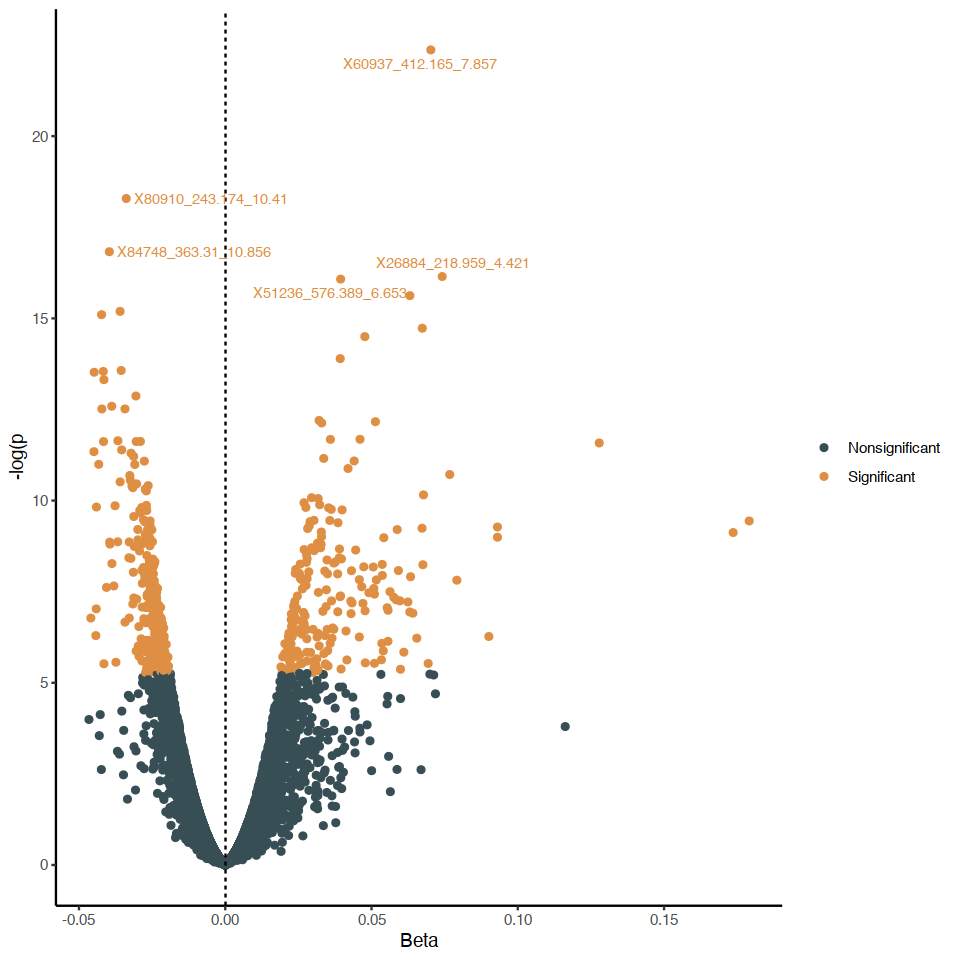

In [69]:
volcano_lat

In [70]:
write.csv(output_lm,"rainfall_t_test.csv")
ggsave("volcano_plot_lattitude.pdf",volcano_lat)

Saving 7 x 7 in image



## T-tests

A heavy rainfall in January 2018 could have influenced the metabolome. We will investigate the effect of the rainfall using t-tests.

In [71]:
Data <- Data %>% add_column(rainfall=ifelse(Data$ATTRIBUTE_Month=="Jan",1,0),.before = 10)

In [72]:
start <- which(names(Data)=="Injection_order")+1

In [73]:
rain_out=NULL
for (i in 1:length(a)){
rain_out[[i]] <- t.test(Data[,a[i]]~Data$rainfall)
}

In [74]:
output_rainfall <- data.frame(colnames(Data[start:ncol(Data)]))
colnames(output_rainfall)[1] <- "Metabolites"
output_rainfall$mean_before <- sapply(1:length(a),function(n){rain_out[[n]]$estimate[1]})
output_rainfall$mean_after <- sapply(1:length(a),function(n){rain_out[[n]]$estimate[2]})
output_rainfall$diff <- output_rainfall$mean_after-output_rainfall$mean_before
output_rainfall$p <- sapply(1:length(a),function(n){rain_out[[n]]$p.value})
output_rainfall["p_bonferroni"] <- p.adjust(output_rainfall$p,method="bonferroni")
output_rainfall["significant"] <- ifelse(output_rainfall$p_bonferroni<0.05,"Significant","Nonsignificant")

In [75]:
output_rainfall %>% arrange(p) %>% head(n=20)

,Metabolites,mean_before,mean_after,diff,p,p_bonferroni,significant
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,X2717_218.102_1.226,-0.6418780,1.2837559,1.925634,1.698330e-84,1.544122e-80,Significant
2,X4505_284.206_2.044,-0.6501167,1.3002335,1.950350,7.507471e-84,6.825793e-80,Significant
3,X61404_444.223_7.906,-0.6604424,1.3208848,1.981327,1.838910e-61,1.671937e-57,Significant
4,X44824_393.154_5.852,0.5787004,-1.1574008,-1.736101,9.871250e-57,8.974940e-53,Significant
5,X68757_415.247_8.994,0.5526702,-1.1053403,-1.658010,1.093689e-50,9.943819e-47,Significant
6,X55620_915.544_7.185,0.5727285,-1.1454570,-1.718185,1.945382e-50,1.768742e-46,Significant
7,X50285_237.148_6.549,0.5548894,-1.1097788,-1.664668,1.449471e-49,1.317859e-45,Significant
8,X58153_335.148_7.488,0.5373750,-1.0747500,-1.612125,8.779201e-45,7.982049e-41,Significant
9,X68144_377.195_8.921,-0.6436959,1.2873918,1.931088,1.484387e-44,1.349604e-40,Significant


In [76]:
volcano_rainfall <- ggplot(output_rainfall,aes(x=diff,y=-log(p,base=10),color=significant))+
  geom_point()+
  theme_classic()+
  scale_color_jama()+
  geom_vline(xintercept = 0, linetype="dashed")+
  xlab("Beta")+
  ylab("-log(p")+
  theme(legend.title = element_blank())+
  geom_text_repel(data=output_rainfall %>% arrange(p) %>% slice_head(n=5),
                aes(label=Metabolites),size=3,show.legend = FALSE,max.overlaps = 100)

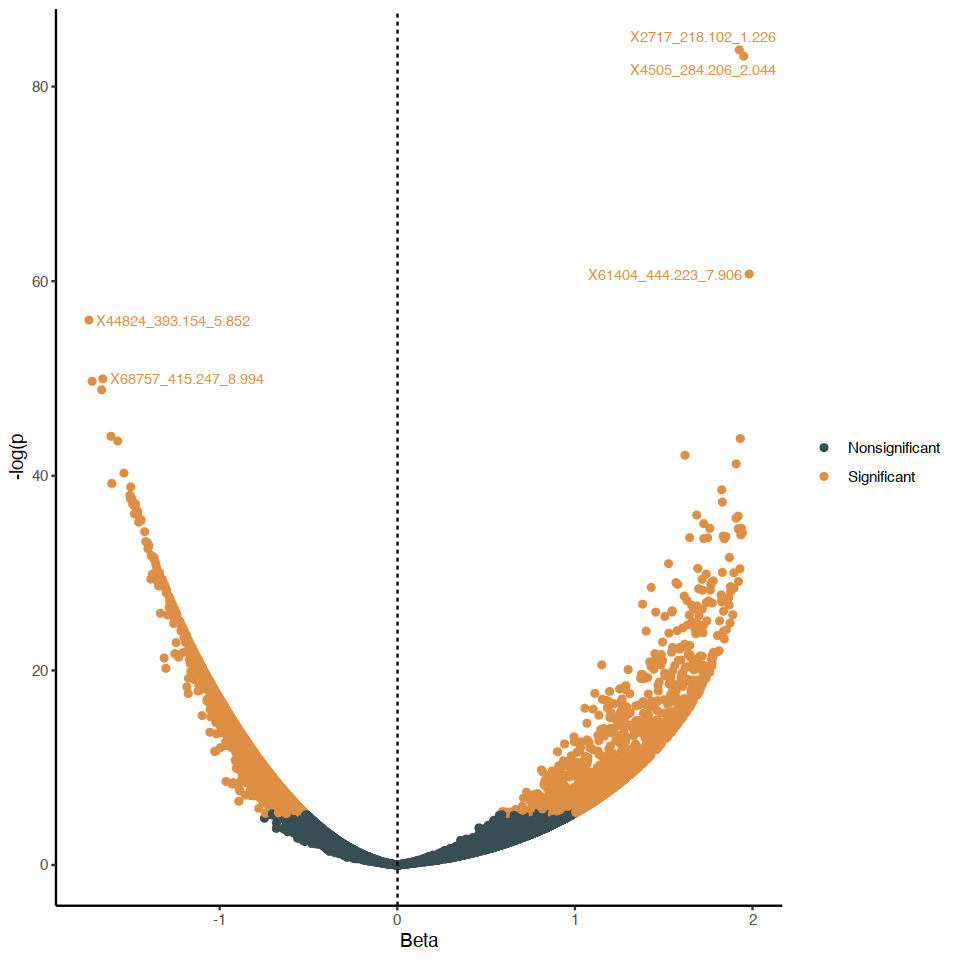

In [77]:
volcano_rainfall

In [78]:
write.csv(output_rainfall,"rainfall_t_test.csv")
ggsave("volcano_plot_rainfall.pdf",volcano_rainfall)

Saving 7 x 7 in image



# PCoA PERMANOVA

Principal coordinates analysis (PCoA)

Principal coordinates analysis (PCoA) is a metric multidimensional scaling (MDS) method that attempts to represent sample dissimilarities in a low-dimensional space. It converts a distance matrix consisting of pair-wise distances (dissimilarities) across samples into a 2- or 3-D graph ([Gower, 2005](https://onlinelibrary.wiley.com/doi/10.1002/0470011815.b2a13070)). Different distance metrics can be used to calculate dissimilarities among samples (e.g. Euclidean, Canberra, Minkowski). Performing a principal coordinates analysis using the Euclidean distance metric is the same as performing a principal components analysis (PCA). The selection of the most appropriate metric depends on the nature of your data and assumptions made by the metric.

Within the metabolomics field the Euclidean, Bray-Curtis, Jaccard or Canberra distances are most commonly used. The Jaccard distance is an unweighted metric (presence/absence) whereas Euclidean, Bray-Curtis and Canberra distances take into account relative abundances (weighted). Some metrics may be better suited for very sparse data (with many zeroes) than others. For example, the Euclidean distance metric is not recommended to be used for highly sparse data.

This video tutorial by StatQuest summarizes nicely the basic principles of PCoA: https://www.youtube.com/watch?v=GEn-_dAyYME

In order to perform a PCoA as described below, it is important that the filenames in our metadata are identical as well as in the same order as the filenames in our feature table.

In [79]:
# name rows in metadata after filenames
rownames(md_Samples) <- md_Samples$filename

In [80]:
# how many files in the metadata are also present in the feature table
table(rownames(md_Samples) %in% rownames(Imp_s))


TRUE 
 180 

Let's bring metadata and feature table samples in the same order and check whether sample names in both data tables are identical (and in the same order). The second boolean value should return TRUE.

In [81]:
identical(rownames(Imp_s),rownames(md_Samples))
# put the rows in the feature table and metadata in the same order
Imp_s <- Imp_s[match(rownames(md_Samples),rownames(Imp_s)),]
identical(rownames(Imp_s),rownames(md_Samples))

[1] TRUE

[1] TRUE

Then, we will calculate pairwise distances across all samples in our centered data using the Euclidean distance metric

In [82]:
distm <- dist(Imp_s, method = "euclidean")# compute distance

All pairwise Euclidean distances are now stored within our distance (dissimilarity) matrix (distm). The distance matrix is then used as input for the PCoA. At first, we here color samples according to the month of the year the samples were retrieved (ATTRIBUTE_Month)

In [91]:
PcoA <- cmdscale(distm, k = 2, eig = T, add = T)
PcoA_points <- as.data.frame(PcoA$points)
variance <- round(PcoA$eig*100/sum(PcoA$eig),1)
names(PcoA_points)[1:2] <- c('PCoA1', 'PCoA2')

head(PcoA_points)

,PCoA1,PCoA2
,<dbl>,<dbl>
SD_01-2018_1_a.mzXML,-49.852728,13.65585
SD_01-2018_1_b.mzXML,-49.423128,15.97896
SD_01-2018_10_a.mzXML,-9.644539,29.77990
SD_01-2018_10_b.mzXML,-3.823113,29.57499
SD_01-2018_11_a.mzXML,-7.286396,32.38714
SD_01-2018_11_b.mzXML,-7.401341,31.90830


In [92]:
identical(rownames(PcoA_points), rownames(md_Samples))

[1] TRUE

Using the ggplot2 library, we can plot our PCoA using the Euclidean distance (=PCA).

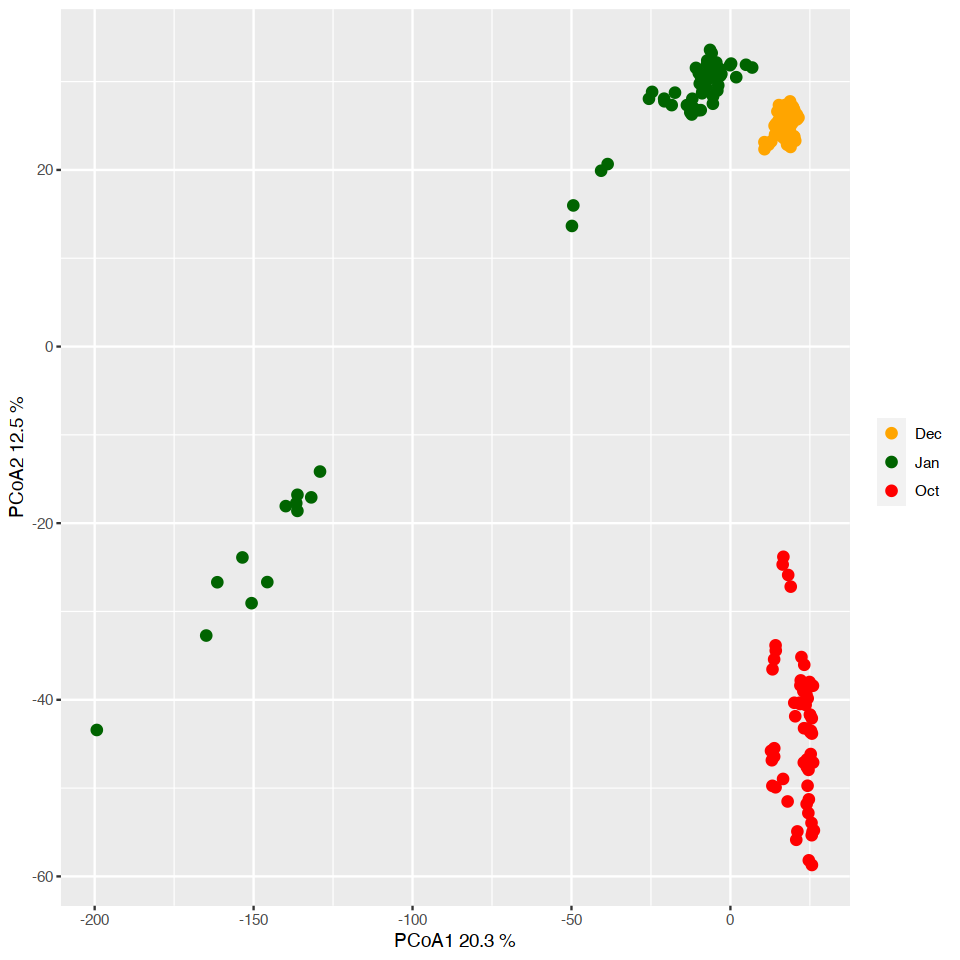

In [98]:
ggplot(PcoA_points, aes(x = PCoA1, y = PCoA2, colour = md_Samples$ATTRIBUTE_Month, label = row.names(PcoA))) +
 geom_point(size=2.5) +
 scale_colour_manual(values = c('orange','darkgreen','red','blue','black')) +
 xlab(paste('PCoA1',variance[1],'%', sep = ' ')) +
 ylab(paste('PCoA2',variance[2],'%', sep = ' ')) +
 theme(legend.title=element_blank())

It looks like there is a strong separation between the chemotypes of seawater sampled during different months. But is the separation significant? Let's perform a permutational multivariate analysis of variance (PERMANOVA) to find out!

**Permutational multivariate analysis of variance (PERMANOVA)**

Permutational multivariate analysis of variance (PERMANOVA) is a non-parametric method for multivariate analysis of variance, where P-values are obtained using permutations. The metric was originally developed within the field of ecology ([Anderson, 2008](https://onlinelibrary.wiley.com/doi/full/10.1002/9781118445112.stat07841)) but is today widely used in other fields, including the microbiome and metabolomics field. PERMANOVA is used to compare groups of samples and tests whether the centroid and/or the spread of the samples is different between the groups.

The adonis2() function in the [vegan package](https://cran.r-project.org/web/packages/vegan/index.html) can be used to perform a PERMANOVA. The input is any dissimilarity matrix and the test-statistic retrieved is a multivariate analogue to Fisher's F-ratio as well as an R2 value (Adonis R2).

In [94]:
adonres <- adonis2(distm ~ md_Samples[,colnames(md_Samples) == 'ATTRIBUTE_Month'])
adonres

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"md_Samples[, colnames(md_Samples) == ""ATTRIBUTE_Month""]",2,385177.2,0.2366727,27.43978,0.001
Residual,177,1242290.8,0.7633273,NA,NA
Total,179,1627468.0,1.0000000,NA,NA


The PERMANOVA test result tells us that there is a significant difference in the metabolomic profiles of seawater sampled during different months (PERMANOVA, P < 0.05, Adonis R2 = 0.2367) and that app. 23% of the variation in our data can be explained by month of sampling. As we already could clearly observe in the PCoA plot, this means that there are strong differences between the chemotypes of seawater sampled at during different months.

**Perform PCoA and assess separation using PERMANOVA**

To speed up the analysis and so we don't have to rewrite the entire code when testing different parameters, we can define a function, which will perform a principal coordinates analysis (PCoA) using a distance metric of choice, calculate a PERMANOVA and plot results in a 2-D graph:

In [95]:
plotPCoA <- function(ft, md, distmetric = c("euclidean", "maximum", "manhattan", "canberra", "binary", 
                                                  "minkowski"), collow = "#810f7c", colhigh ="#f7fcb9", 
                      catper = "plate", catcols = "plate", mdtype = 'categorical', 
                      cols = c('grey','black','orange','pink','darkgreen','darkred','brown','blue','skyblue3','green'),
                      title = 'Principal coordinates plot'){
    
    catper <<- catper
    distm <- dist(ft, method = distmetric)
    d <- as.matrix(distm)

    if (length(which(is.na(md[,colnames(md) == catper]))) !=0){
          red <- as.dist(as.matrix(distm)[-which(is.na(md[,colnames(md) == catper])),-which(is.na(md[,colnames(md) == catper]))])
          adonres <- adonis2(red ~ na.omit(md[,colnames(md) == catper]))
          Rsq <- adonres$R2[1]
          pval <- adonres$'Pr(>F)'[1]
        } else {
          adonres <- adonis2(distm ~ md[,colnames(md) == catper])
          Rsq <- adonres$R2[1]
          pval <- adonres$'Pr(>F)'[1]
        }

    PcoA <- cmdscale(distm, k =2, eig = T, add = T)
    PcoA_points <- as.data.frame(PcoA$points)
    variance <- round(PcoA$eig*100/sum(PcoA$eig),1)
    names(PcoA_points)[1:2] <- c('PCoA1', 'PCoA2')
    PcoA_points <- as.data.frame(PcoA_points)
    PcoA_points$Group <- md[,colnames(md) == catcols][match(rownames(PcoA_points),rownames(md))]
    names(PcoA_points)[1:2] <- c('PCoA1', 'PCoA2')
    
    # plot
    cbPalette <- cols

    if (mdtype == 'continuous'){
          Tr_PcoA <- ggplot(PcoA_points, aes(x = PCoA1, y = PCoA2, colour = Group, label = row.names(PcoA))) + geom_point(size=2.5) +
            scale_colour_gradient(low = collow, high = colhigh,space = "Lab", na.value = "grey50", guide = "colourbar",aesthetics = "colour")+
            theme(legend.title=element_blank()) +
            xlab(paste('PCoA1',variance[1],'%', sep = ' ')) +
            ylab(paste('PCoA2',variance[2],'%', sep = ' ')) +
            ggtitle(paste(title,paste0("(p=",round(pval,4),","),paste0("adonis-R2=",round(Rsq,4),")"),sep=" "))

        } else {

          Tr_PcoA <- ggplot(PcoA_points, aes(x = PCoA1, y = PCoA2, colour = Group, label = row.names(PcoA))) + geom_point(size=2.5) +
            scale_colour_manual(values = cbPalette) +
            theme(legend.title=element_blank()) +
            xlab(paste('PCoA1',variance[1],'%', sep = ' ')) +
            ylab(paste('PCoA2',variance[2],'%', sep = ' ')) +
            ggtitle(paste(title,paste0("(p=",round(pval,4),","),paste0("adonis-R2=",round(Rsq,4),")"),sep=" "))
        }
    
    print(Tr_PcoA)
}

By defining different parameters within the plotPCoA function:

- **distmetric:** A distance metric of your choice, including "euclidean", "maximum", "manhattan", "canberra", "binary" or "minkowski".
- **catper:** How should the samples be grouped for PERMANOVA, this can be any column name of your metadata.
- **catcols:** According to what groups should the samples be colored on the PCoA, this can be any column name of your metadata.
mdtype: Either 'categorical' or 'continuous', this value defines whether a continuous or categorical color scale should be used for the PCoA.
- **cols:** Colors used for plotting the groups in the PCoA. The length of this object should be equal to the number of groups plotted.
- **title:** Any title of your choice you want to give the plot.<br>

we can quickly draw the same PCoA plot as above and retrieve PERMANOVA test results at the same time.

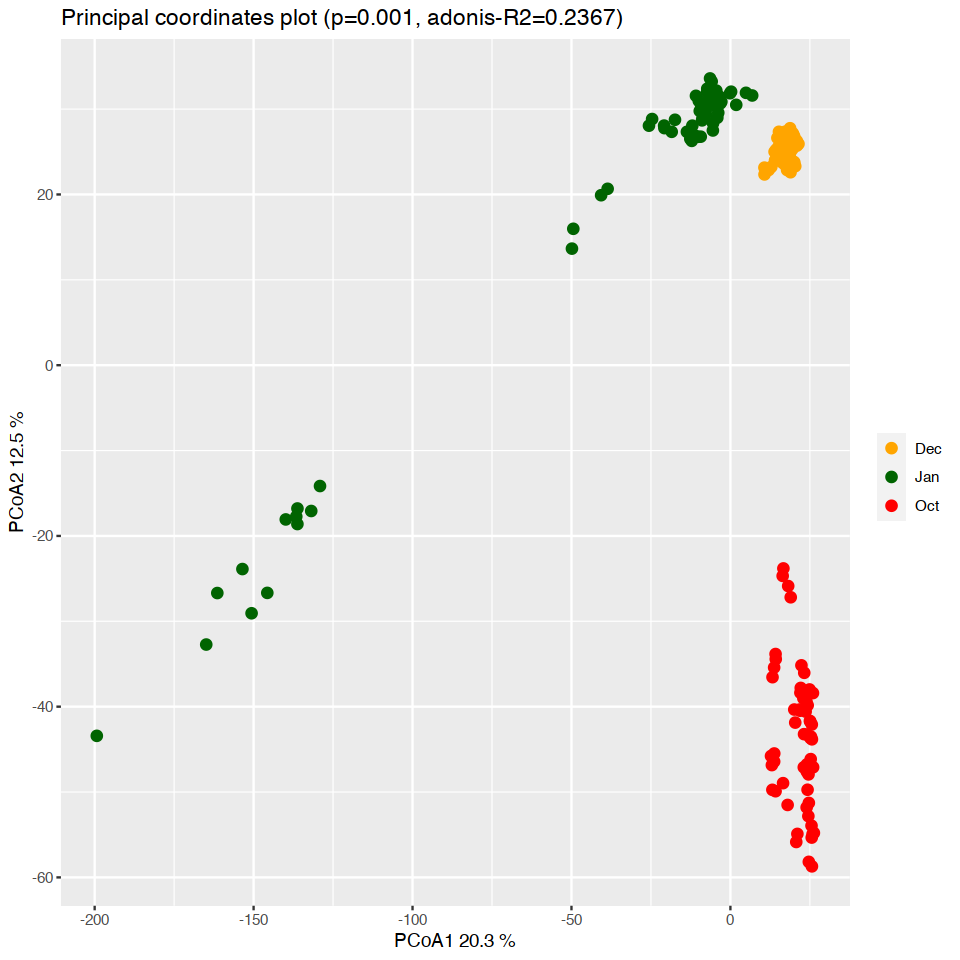

In [97]:
plotPCoA(Imp_s, md_Samples, distmetric = "euclidean", catper = "ATTRIBUTE_Month", catcols = "ATTRIBUTE_Month", mdtype = 'categorical', 
                      cols = c('orange','darkgreen','red','blue','black'),
                      title = 'Principal coordinates plot')

- We can also test a different distance metric and look at the separation of samples. During data cleanup we replaced all zero values with the minimum value found in our feature table. We might want to opt not to impute any values but instead use a distance metric that can deal better with missing values (e.g. Canberra).

We will use the non-imputed, scaled feature table for that purpose. Before scaling, we will replace all zero values in the non-imputed feature table with NAs.

In [112]:
ft_nonimp <- t(Blank_removal)

In [113]:
identical(rownames(ft_nonimp),rownames(md_Samples))

[1] TRUE

In [114]:
ft_nonimp[ft_nonimp == 0] <- NA

In [115]:
fts_nonimp <- scale(ft_nonimp, scale = TRUE, center = TRUE)

How many missing values do we have (in %)?

In [116]:
(sum(is.na(ft_nonimp))*100)/(dim(ft_nonimp)[1]*dim(ft_nonimp)[2])

[1] 32.48815

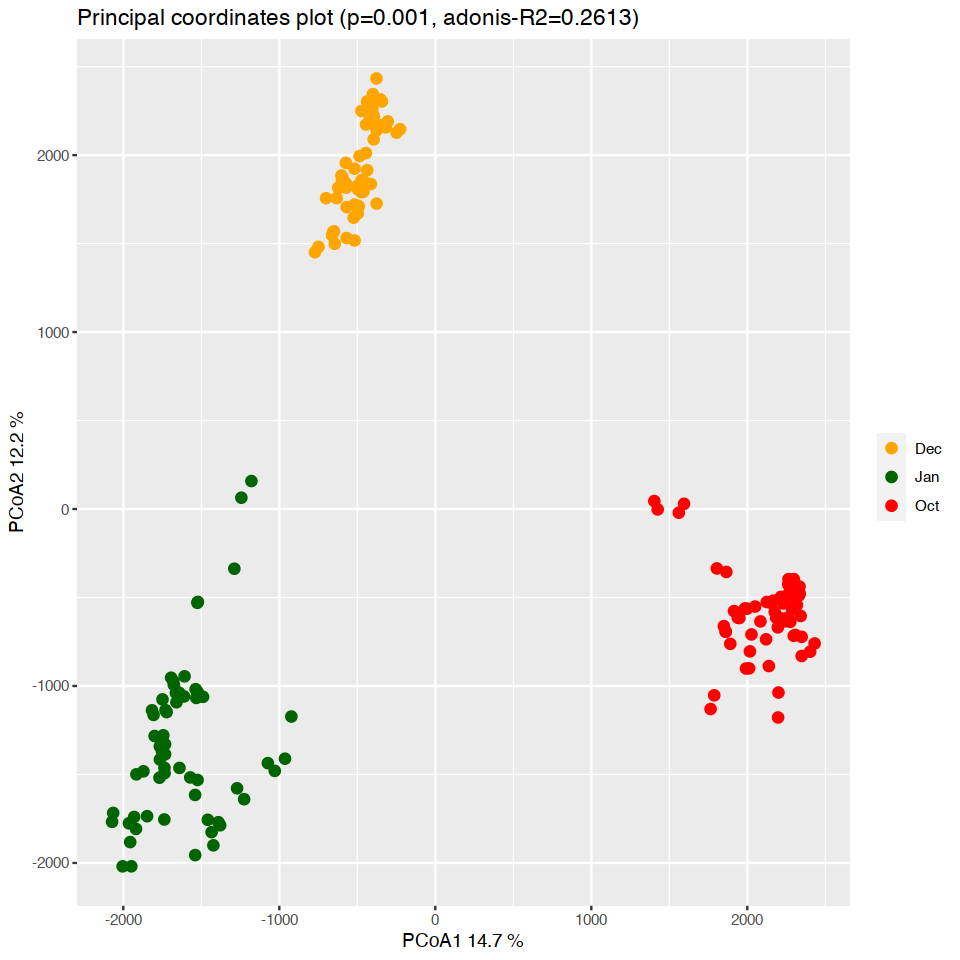

In [117]:
plotPCoA(fts_nonimp, md_Samples, distmetric = "canberra", catper = "ATTRIBUTE_Month", catcols = "ATTRIBUTE_Month", mdtype = 'categorical', 
                      cols = c('orange','darkgreen','red','blue','black'),
                      title = 'Principal coordinates plot')

Using the Canberra distance metric, we also see a significant difference in the metabolomic profiles of seawater collected during different months (PERMANOVA, P < 0.05, Adonis R2 = 0.2613) with app. 26% of the variation in our data explained by month of sampling.

Lastly, let's also test a binary metric, the Jaccard metric. When we apply the Jaccard metric we need to work with the non-imputed, non-scaled feature table, where all missing values need to be converted to 0s. A positive value will be interpreted as 1 (present) and missing values as 0 (absent).

In [118]:
ft_nonimp_0 <- ft_nonimp
ft_nonimp_0[is.na(ft_nonimp_0)] <- 0

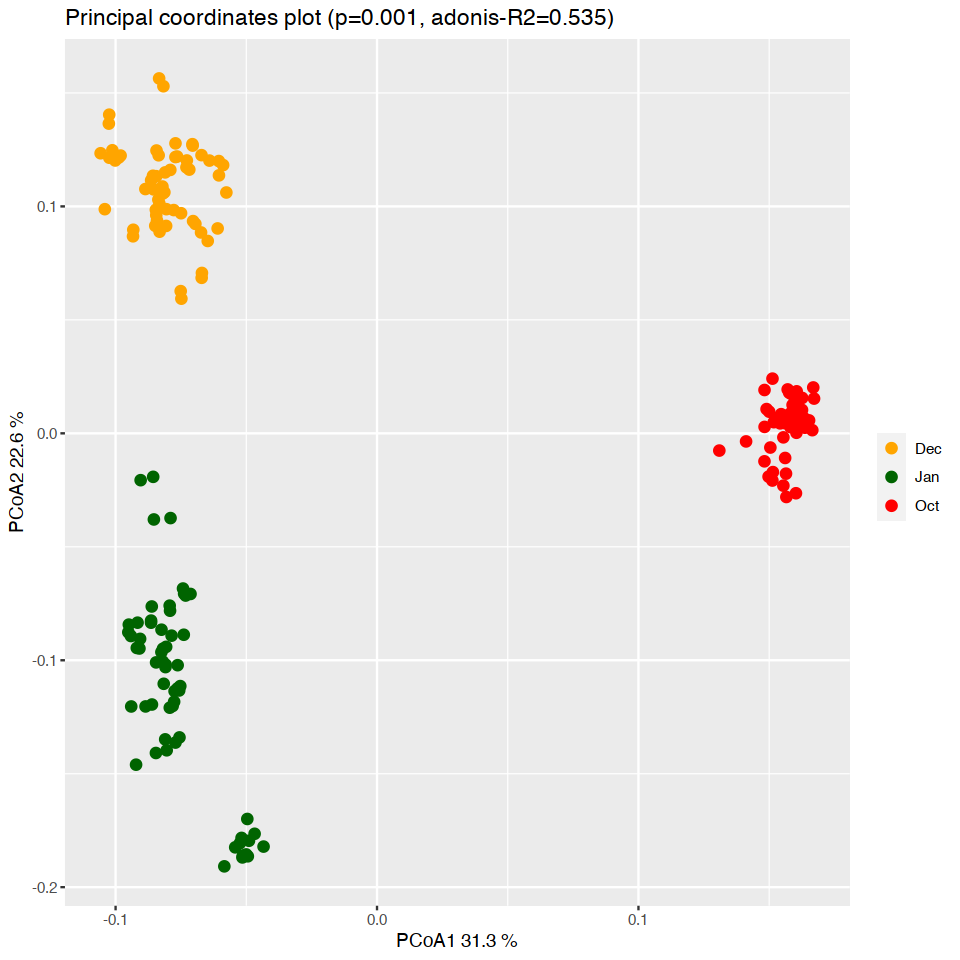

In [119]:
plotPCoA(ft_nonimp_0, md_Samples, distmetric = "binary", catper = "ATTRIBUTE_Month", catcols = "ATTRIBUTE_Month", mdtype = 'categorical', 
                      cols = c('orange','darkgreen','red','blue','black'),
                      title = 'Principal coordinates plot')

Using the Jaccard distance metric, we also see a significant difference in the metabolomic profiles of seawater collected during different months (PERMANOVA, P < 0.05, Adonis R2 = 0.535) with app. 53% of the variation in our data explained by month of sampling. We observe the highest R2 using the Jaccard metric, indicating that differences in seawater chemotypes between different months are mainly qualitative.

We can also test whether there a significant differences in metabolomic profiles between different sample areas

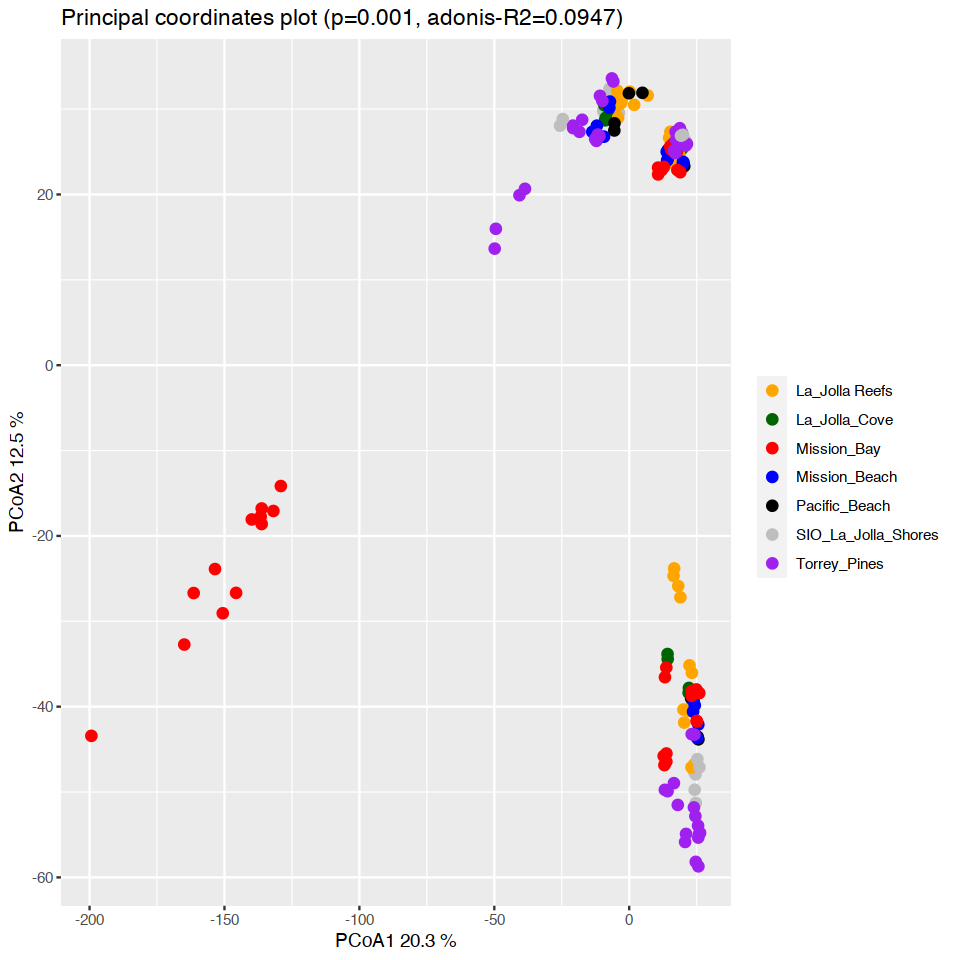

In [126]:
plotPCoA(Imp_s, md_Samples, distmetric = "euclidean", catper = "ATTRIBUTE_Sample_Area", catcols = "ATTRIBUTE_Sample_Area", mdtype = 'categorical', 
                      cols = c('orange','darkgreen','red','blue','black','grey','purple'),
                      title = 'Principal coordinates plot')

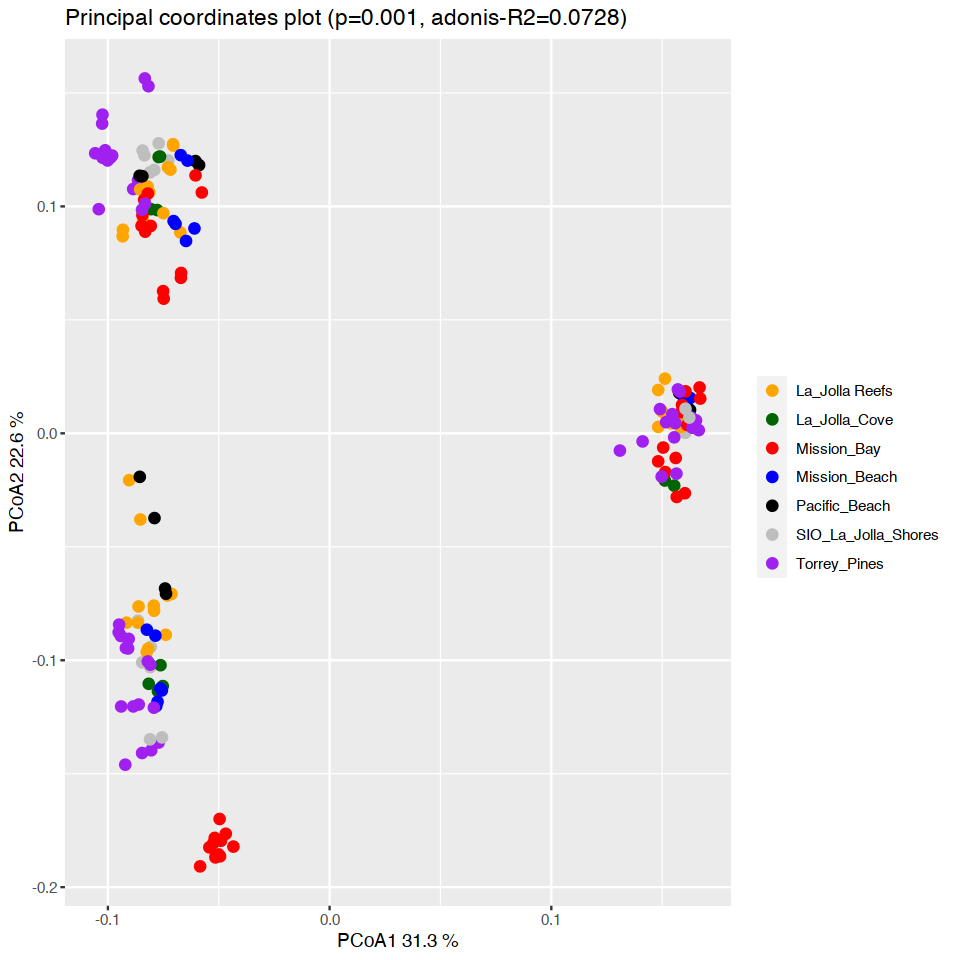

In [127]:
plotPCoA(ft_nonimp_0, md_Samples, distmetric = "binary", catper = "ATTRIBUTE_Sample_Area", catcols = "ATTRIBUTE_Sample_Area", mdtype = 'categorical', 
                      cols = c('orange','darkgreen','red','blue','black','grey','purple'),
                      title = 'Principal coordinates plot')

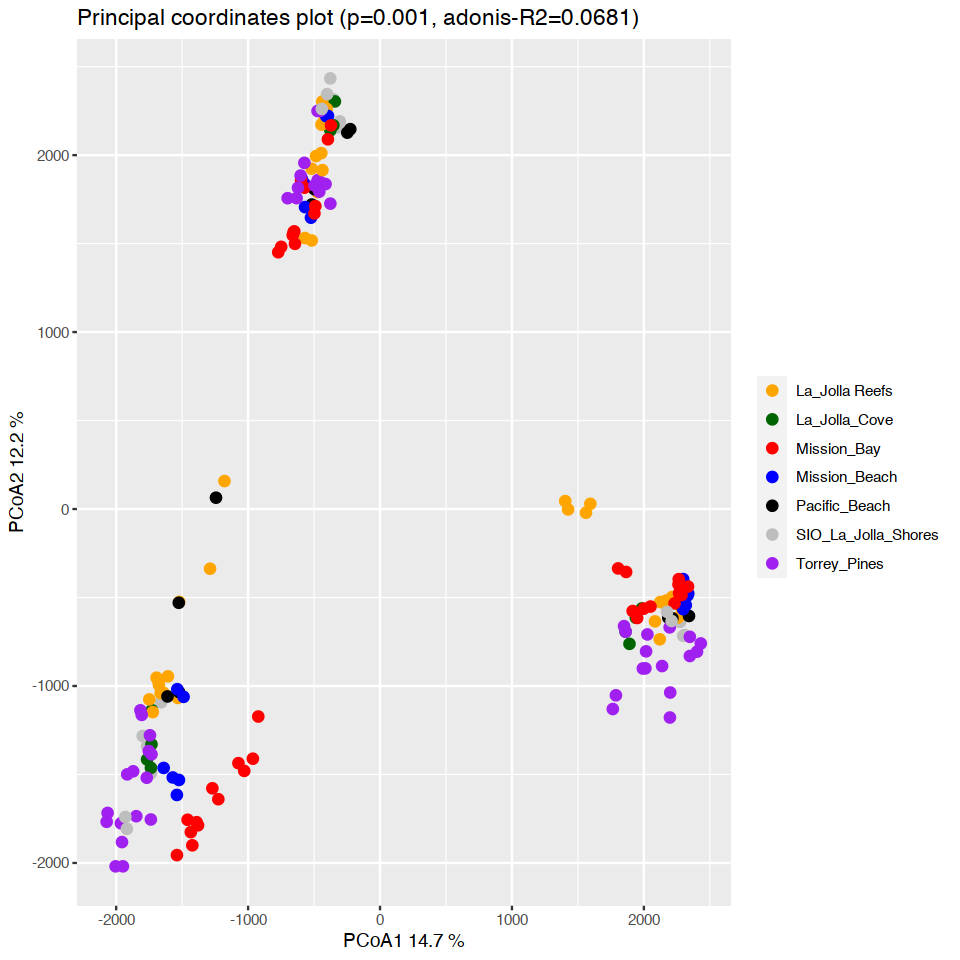

In [128]:
plotPCoA(fts_nonimp, md_Samples, distmetric = "canberra", catper = "ATTRIBUTE_Sample_Area", catcols = "ATTRIBUTE_Sample_Area", mdtype = 'categorical', 
                      cols = c('orange','darkgreen','red','blue','black','grey','purple'),
                      title = 'Principal coordinates plot')

The results tell us that there are significant differences in the metabolomic profiles of seawater collected at different sampling areas (PERMANOVA p-value < 0.05). However, the differences are not as strong as the differences observed for month of sampling with only 9% and 7% respectively of the variation in the data explained by sampling area.

We can do the same for year of sampling or injection order

In [133]:
md_Samples$ATTRIBUTE_Year <- as.factor(md_Samples$ATTRIBUTE_Year)

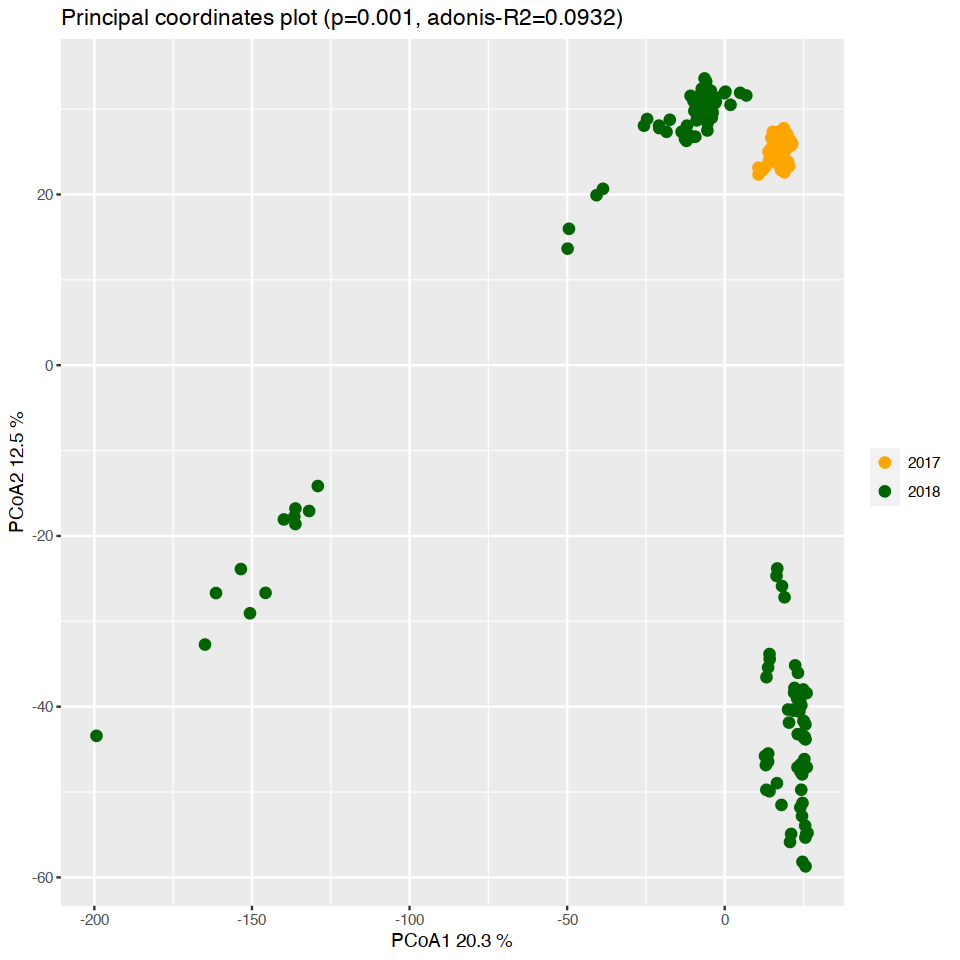

In [134]:
plotPCoA(Imp_s, md_Samples, distmetric = "euclidean", catper = "ATTRIBUTE_Year", catcols = "ATTRIBUTE_Year", mdtype = 'categorical', 
                      cols = c('orange','darkgreen','red','blue','black','grey','purple'),
                      title = 'Principal coordinates plot')

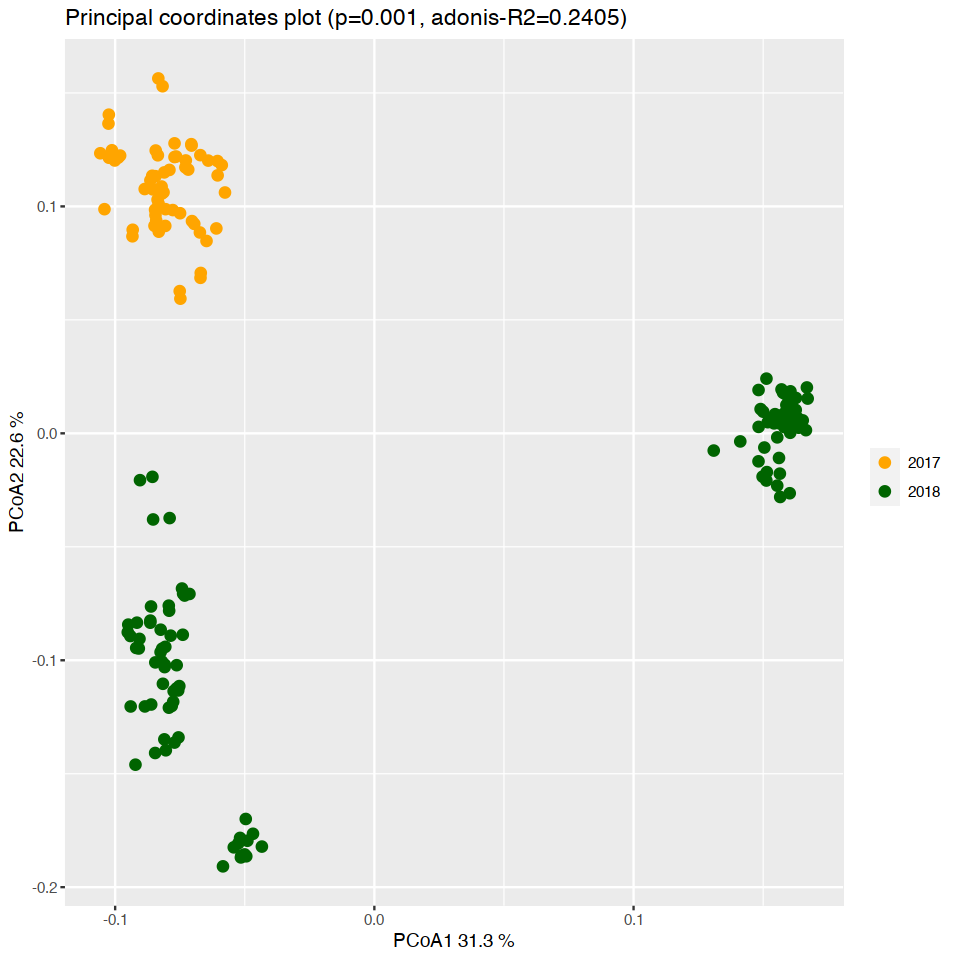

In [135]:
plotPCoA(ft_nonimp_0, md_Samples, distmetric = "binary", catper = "ATTRIBUTE_Year", catcols = "ATTRIBUTE_Year", mdtype = 'categorical', 
                      cols = c('orange','darkgreen','red','blue','black','grey','purple'),
                      title = 'Principal coordinates plot')

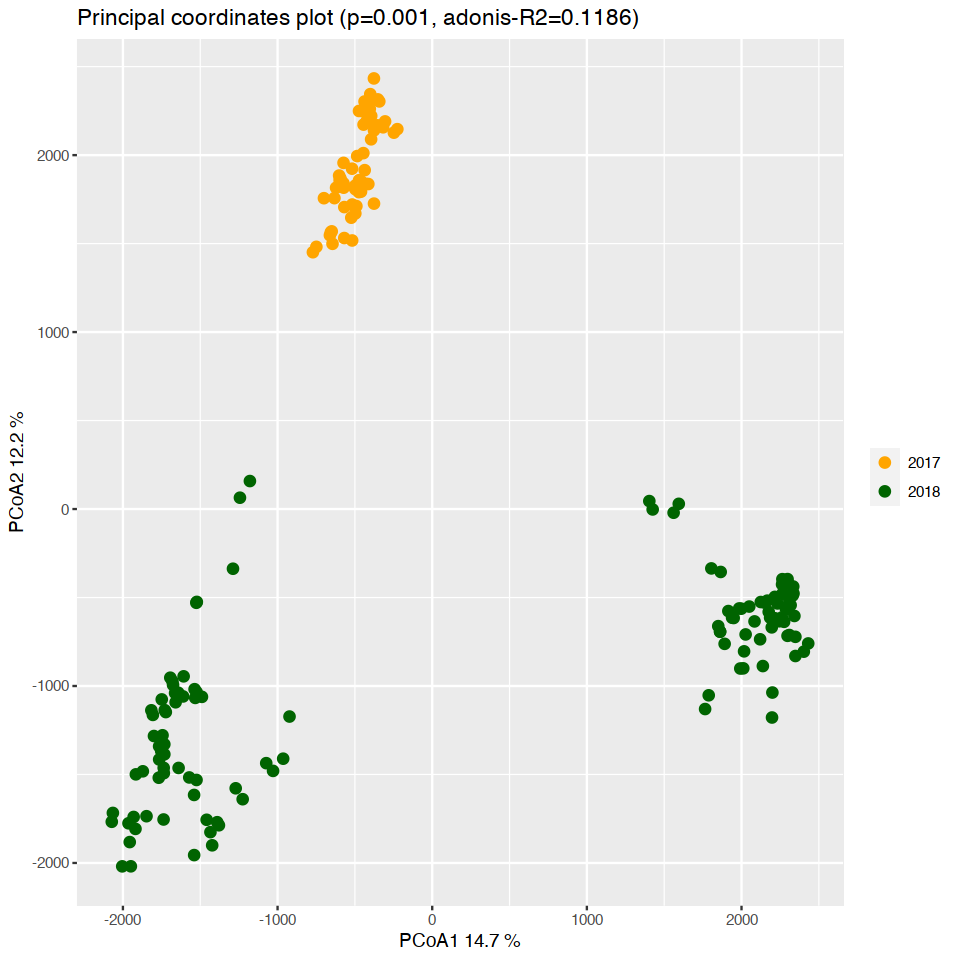

In [136]:
plotPCoA(fts_nonimp, md_Samples, distmetric = "canberra", catper = "ATTRIBUTE_Year", catcols = "ATTRIBUTE_Year", mdtype = 'categorical', 
                      cols = c('orange','darkgreen','red','blue','black','grey','purple'),
                      title = 'Principal coordinates plot')

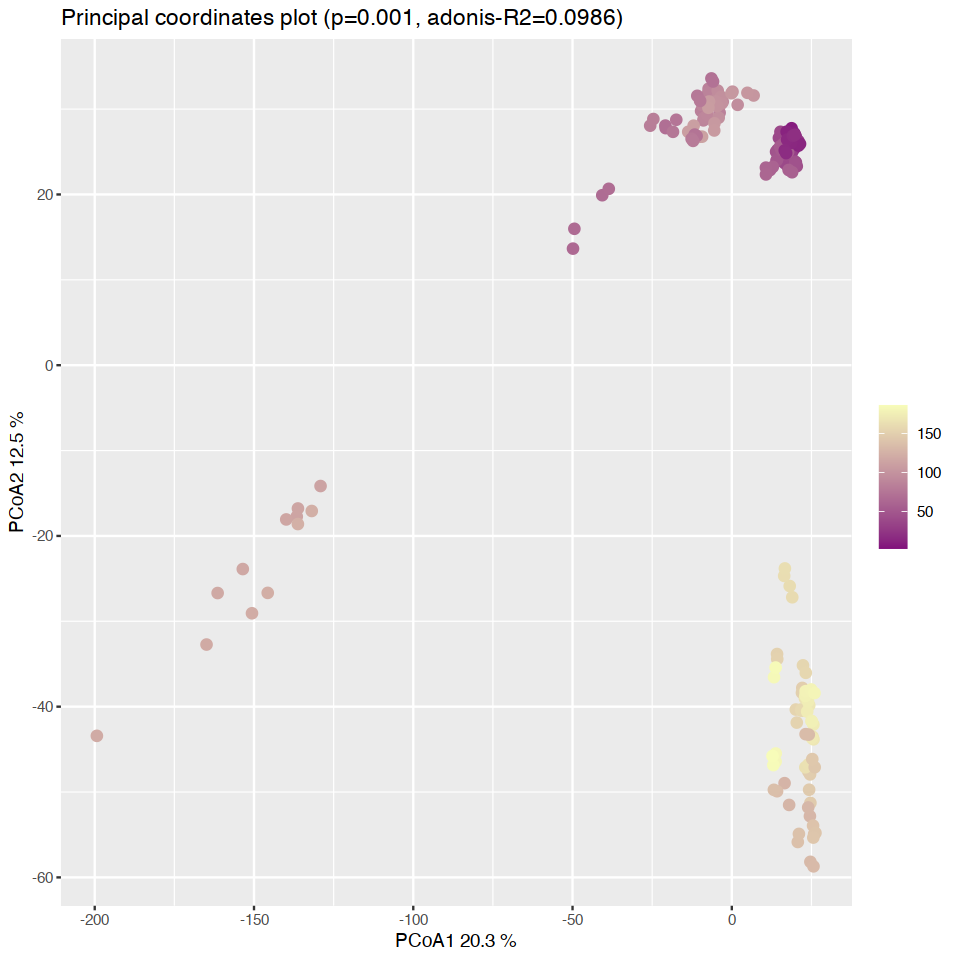

In [137]:
plotPCoA(Imp_s, md_Samples, distmetric = "euclidean", catper = "Injection_order", catcols = "Injection_order", mdtype = 'continuous', 
                      cols = c('orange','darkgreen','red','blue','black','grey','purple'),
                      title = 'Principal coordinates plot')

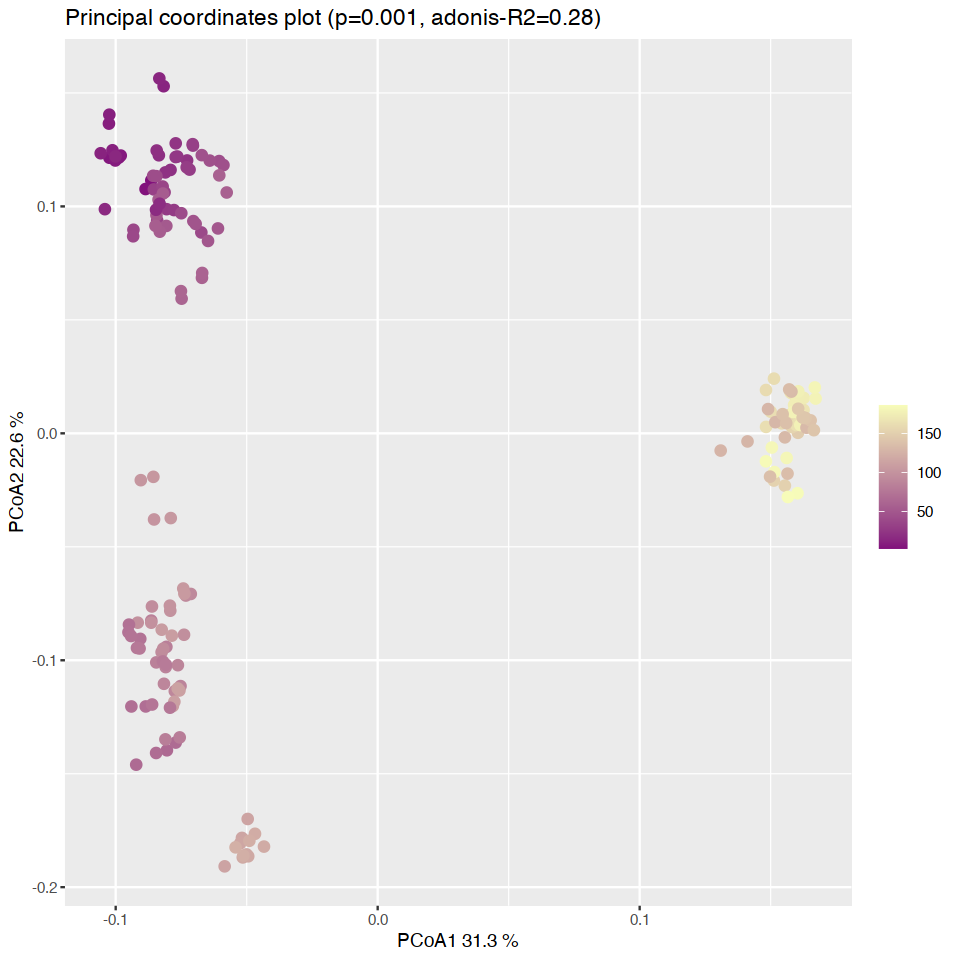

In [138]:
plotPCoA(ft_nonimp_0, md_Samples, distmetric = "binary", catper = "Injection_order", catcols = "Injection_order", mdtype = 'continuous', 
                      cols = c('orange','darkgreen','red','blue','black','grey','purple'),
                      title = 'Principal coordinates plot')

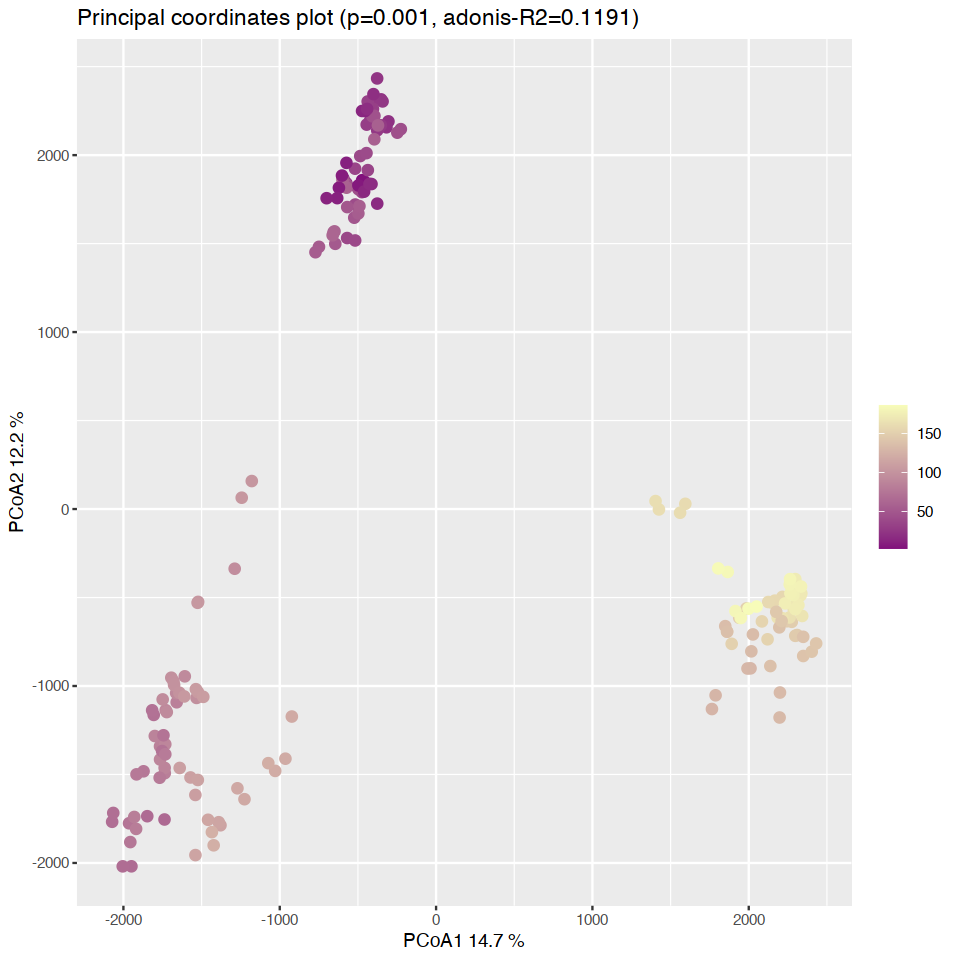

In [139]:
plotPCoA(fts_nonimp, md_Samples, distmetric = "canberra", catper = "Injection_order", catcols = "Injection_order", mdtype = 'continuous', 
                      cols = c('orange','darkgreen','red','blue','black','grey','purple'),
                      title = 'Principal coordinates plot')

# Hierarchial Clustering Algorithm:

We are now ready to perform a cluter analysis. The concept behind hierarchical clustering is to repeatedly combine the two nearest clusters into a larger cluster.

The first step consists of calculating the distance between every pair of observation points and stores it in a matrix;
1. It puts every point in its own cluster;
2. It merges the closest pairs of points according to their distances;
3. It recomputes the distance between the new cluster and the old ones and stores them in a new distance matrix;
4. It repeats steps 2 and 3 until all the clusters are merged into one single cluster. <br>

Next, we perform the hierarchical clustering. As you can see in the following code we need to specify the 'method' argument. This argument tells the algorithm how to measure the distance between clusters and it's usually referred as 'Linkage Method'. There are several and you can explore different options here https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/hclust. Usually, you will try different ones and plot the result.

Here, we use the default 'complete' (i.e. complete-linkage), which calculates the maximum distance between clusters before merging.

In [ ]:
set.seed(1234) # Setting a seed for reproducing the same result
hclust_res <- hclust(distm, method = 'complete')
plot(hclust_res) #visualize the cluster relationships in a tree-like diagram called dendrogram

In the above dendogram, the distance of split or merge is given as the y axis 'height'. You can also cut the dendrogram to create the desired number of clusters. In this case, it seems we have 3 main 'splits', further divided into a total of 4 clusters. We are going to use the cutree() function for this https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/cutree.

In [ ]:
cut_res <- cutree(hclust_res, k = 3) # where k indicates the number of clusters we want
# the cluster assignment
data.frame(cut_res)

In [ ]:
# counting the number of samples present in each cluster
table(data.frame(cut_res))

In [ ]:
# highlight the clusters in the dendrogram by coloring their borders.
plot(hclust_res)
rect.hclust(hclust_res, k = 3, border = 1:3)

In [ ]:
# Coloring the entire clusters with different colors
dend_obj <- as.dendrogram(hclust_res)
col_dend <- color_branches(dend_obj, k = 3)
plot(col_dend)

**Can we define the number of clusters using a simple approach? We are going to use the NbClust and factoextra packages for this purpose.**

We start with the Elbow approach. The Elbow method looks at the total within-cluster sum of square (WSS) as a function of the number of clusters. WSS: sum of distances between the points and the corresponding centroids for each cluster.

In [ ]:
# Elbow method. Here we use 'hcut' which computes the hierarchical clustering and cut the tree.
fviz_nbclust(Imp_s, hcut, method = "wss") +
  geom_vline(xintercept = 4, linetype = 2) + # add line indicating what you think is the optimal number of clusters
  labs(subtitle = "Elbow method") # add subtitle

The location of a 'elbow' in the plot is usually considered as an indicator of the appropriate number of clusters because it means that adding another cluster does not improve the grouping. This method seems to suggest 4 clusters. However, the Elbow method is sometimes ambiguous. As we can see from the plot above, the 'elbow' could be located at 3 or 4 clusters.
An alternative is the average silhouette method. The Silhouette method measures the quality of a clustering and determines how well each point lies within its cluster.

In [ ]:
# Silhouette method
fviz_nbclust(Imp_s, hcut, method = "silhouette") + labs(subtitle = "Silhouette method")

In this case, the silouette method seems to find 2 main clusters. There are several other methods to discover the optimal number of clusters and sometimes they do not fully agree. Often, you will need to bring your own knowledge about the specific field to decide whether the number of clusters makes sense.

As you can see, no matter which approach we use for finding the optimal number of clusters, the hierarchical clustering was able to identify meaningful clusters. However, based on the parameters that we have selected it seems that sample types 'M' and 'A5M' cluster together. Is this meaningful?

Sometimes, you may get unexpected results that are not only related to the selection of parameters but also to the input data. For instance, noisy data will lead to different clusters and interpretation of the results. For example, you could consider to remove features having zero-variance or zero Median Absolute Deviation prior to perform any further downstream analysis (remember that we usually impute quite a lot of data in metabolomics and this could create this zero-variance issue).

In [ ]:
# To remove features having zero Median Absolute Deviation:use the following function 
#(just replace 'mad' with 'var' for the variance)
removeZeroMad <- function(df){
  df[, sapply(df, mad) != 0]
}

In [ ]:
# we apply the function to the input data before scaling
Imp_noZeroMad <- removeZeroMad(as.data.frame(Imp_t))
dim(Imp_t)
dim(Imp_noZeroMad)

As you can see, some features were removed after this filtering step. What happens if we perform clustering again?

In [ ]:
# first, we scale the matrix
Imp_noZeroMad_s <- scale(Imp_noZeroMad, scale = T, center = T)
# then we calculate the distance matrix
distm_noZeroMad <- dist(Imp_noZeroMad_s, method = "euclidean")
# then we perform clustering
set.seed(1234)
hclust_noZeroMad <- hclust(distm_noZeroMad, method = 'complete')
# finally, we plot the result
plot(hclust_noZeroMad)

In this case, the result is not affected and 'M' and 'A5M' samples still cluster together. This is also a nice proof that the noisy features that we have removed might not contribute much to the clustering and the interpretation of the result is still the same. Therefore, 'M' and 'A5M' samples share clear metabolic similarities. (*About one of the A5M samples clustering separate?*)

# Heatmaps:
In the next section we will add an additional layer in our visualization by plotting a heatmap together with the hierarchical clustering.

First, we prepare the 'decoration' for our heatmap. We want to show the 'ATTRIBUTE_Sample' and 'ATTRIBUTE_Time-Point' colored in a distinctive way. It is much easier to read the heatmap in this way.

We are going to use the ComplexHeatmap package https://jokergoo.github.io/ComplexHeatmap/reference/Heatmap.html

In [ ]:
# metadata of interests are ATTRIBUTE: Timepoint and Samples
InsideLevels(md_Samples)

In [ ]:
# create a dataframe with just the metadata of interest
ann <- data.frame(md_Samples$`ATTRIBUTE_Sample`, md_Samples$`ATTRIBUTE_Time-Point`)
# assign better column names to the dataframe
colnames(ann) <- c('Sample', 'Time_point')
# select some colors of your choice. Explore more colors using the RColorBrewer package or by simply check for the hex code https://www.color-hex.com/
colours <- list('Sample' = c('M' = 'grey', 'A5M' = 'darkorange', 'A15M' = 'darkred', 'A45M' = 'darkgreen'),
  'Time_point' = c('0' = 'grey', '5' = 'darkorange', '15' = 'darkred', '45' = 'darkgreen'))
  
# the function in ComplexHeatmap for preparing the annotation object 
colAnn <- HeatmapAnnotation(df = ann,col = colours,annotation_width = unit(c(1, 4), 'cm'),gap = unit(1, 'mm'))

ComplexHeatmap gives you a flexible function and it is easy to change parameters. You can take a look at the options here https://jokergoo.github.io/ComplexHeatmap/reference/Heatmap.html

In the following, we will perform hierarchical clustering based on Euclidean distance. ComplexHeatmap uses the R package hclust for this purpose, that we already saw in the previous section. As we said, Euclidean distance is just an example that fits well continuous numerical values in your dataset but there are several distance measures such as Manhattan, Minkowski, Canberra etc.
If you have binary data, you may consider to use Jaccard distance.

In [ ]:
# set the parameters for the type of clustering to perform. You can play with different options
set.seed(1234)
hmap <- Heatmap(
  t(Imp_s),
  heatmap_legend_param = list(title = "Scaled/centered\nintensity"), 
  col = c("blue","white","darkred"),
  show_row_names = FALSE,show_column_names = FALSE,
  cluster_rows = TRUE,cluster_columns = TRUE,
  show_column_dend = TRUE,show_row_dend = TRUE,
  row_dend_reorder = TRUE,column_dend_reorder = TRUE,
  clustering_distance_rows = "euclidean",clustering_distance_columns = "euclidean",
  clustering_method_rows = "complete",clustering_method_columns = "complete",
  width = unit(100, "mm"),
  top_annotation = colAnn)

In [ ]:
# draw heatmap. It can take some time if your input data is quite large
draw(hmap, heatmap_legend_side="right", annotation_legend_side="right")

As we can see, by using this type of visualization we can clearly observe the similarities between samples and features, in particular we can see again that sample types 'M' and 'A5M' are quite similar. We can also apply a method for dividing the heatmap according to a cluster assignment, similarly to the cutree() step, for generating better visualizations that can help the interpretation of the results.

ComplexHeatmap contains a function to find clusters by using another clustering algorithm called k-means.

In [ ]:
# set the parameters for the type of clustering to perform. You can play with different options
set.seed(1234)
hmap_km <- Heatmap(
  t(Imp_s),
  heatmap_legend_param = list(title = "Scaled/centered\nintensity"), 
  col = c("blue","white","darkred"),
  show_row_names = FALSE,show_column_names = FALSE,
  cluster_rows = TRUE,cluster_columns = TRUE,
  show_row_dend = TRUE,show_column_dend = TRUE,
  row_dend_reorder = TRUE,column_dend_reorder = TRUE,
  clustering_distance_rows = "euclidean",clustering_distance_columns = "euclidean",
  clustering_method_rows = "complete",clustering_method_columns = "complete",
  width = unit(100, "mm"),
  top_annotation = colAnn,
  # Parameters to perform k-means clustering:  
  row_km = 3, row_km_repeats = 100, #row_km indicates the no.of clusters you want in the rows
  column_km = 3, column_km_repeats = 100) #column_km refers to the no.of clusters you want in the columns

# draw heatmap. It can take some time if your input data is quite large
draw(hmap_km, heatmap_legend_side="right", annotation_legend_side="right")

In the next step, we extract the features belonging to the clusters for future use.

In [ ]:
row_order_res <- row_order(draw(hmap_km, heatmap_legend_side="right", annotation_legend_side="right"))  

In [ ]:
# check/confirm size of clusters
lapply(row_order_res, function(x) length(x))

In [ ]:
# loop to extract features for each cluster
out_res <- NULL
for (i in seq_along(row_order_res)){
out_res[[i]] <- cbind(colnames(Imp_s[,row_order_res[[i]]]), paste("cluster", i, sep=""))  
}

out_res <- as.data.frame(do.call(rbind, out_res)) #getting the list elements into a dataframe
colnames(out_res) <- c('feature','cluster')
dim(out_res) # dimension of the object
table(out_res$cluster) # number of features in each cluster
head(out_res)

# save the data frame with cluster information
write.csv(out_res, file.path(fName,'feature_clusters.csv'),row.names =F, sep='\t')

In [ ]:
# save the heatmap in svg format.The plot can be imported & modified  in Illustrator or similar program.
svglite(filename=paste0(fName,'/heatmap.svg'), width=10, height=8, bg='white')
draw(hmap_km, heatmap_legend_side="right", annotation_legend_side="right")
dev.off()

## Getting output files from Google Colab:
<a id="colab_output"></a>
For Google Collab users, we can zip the result folder which contains all the output files using the next cell and download the zip file directly from the folder "/content/My_TestData" into the local system.

In [ ]:
#Only for Google Colab
#utils::zip(zipfile = 'TestData_Workflow_Results', files = "/content/My_TestData_Workflow_Results/")